<a href="https://colab.research.google.com/github/youcine/Diamond-Price-Prediction-with-Machine-Learning/blob/main/Latest_Diamond_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  **Data Importing**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error

In [2]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import joblib

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [25]:
df = pd.read_csv("/content/drive/MyDrive/train.csv")
test_data = pd.read_csv("/content/drive/MyDrive/test.csv")

#df = pd.read_csv("/content/train.csv")
#test_data = pd.read_csv("/content/test.csv")


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43152 entries, 0 to 43151
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       43152 non-null  int64  
 1   carat    43152 non-null  float64
 2   cut      43152 non-null  object 
 3   color    43152 non-null  object 
 4   clarity  43152 non-null  object 
 5   depth    43152 non-null  float64
 6   table    43152 non-null  float64
 7   price    43152 non-null  int64  
 8   x        43152 non-null  float64
 9   y        43152 non-null  float64
 10  z        43152 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.6+ MB


In [ ]:
df.head()

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,2,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,5,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50


In [ ]:
df.describe().style.background_gradient(cmap='pink',axis=None)

,Id,carat,depth,table,price,x,y,z
count,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000
mean,21576.500000,0.797855,61.747177,57.458347,3929.491912,5.731568,5.735018,3.538568
std,12457.053745,0.473594,1.435454,2.233904,3985.527795,1.121279,1.148809,0.708238
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,10788.750000,0.400000,61.000000,56.000000,947.750000,4.710000,4.720000,2.910000
50%,21576.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,32364.250000,1.040000,62.500000,59.000000,5312.000000,6.540000,6.540000,4.040000
max,43152.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:
df.shape

(43152, 11)

**Checking for null values: there is no null values**


In [ ]:
missing_count = df.isnull().sum()
missing_count

Id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [ ]:
missing_count = test_data.isnull().sum()
missing_count

Id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
dtype: int64

**Cheking for unique values**

In [ ]:
#cheking for unique values in every column so we can study the trends and make visualization
df.nunique()

Id         43152
carat        266
cut            5
color          7
clarity        8
depth        179
table        121
price      10640
x            546
y            543
z            368
dtype: int64

**Checking for duplicates: there is no duplicates**

In [ ]:
#Check for duplicate rows
df.duplicated().sum()

0

**Checking for the categories and the unkwon values**

In [ ]:
df['color'].unique()

array(['I', 'G', 'F', 'H', 'D', 'E', 'J'], dtype=object)

In [ ]:
df['clarity'].unique()


array(['SI2', 'VVS2', 'VS2', 'IF', 'VS1', 'SI1', 'VVS1', 'I1'],
      dtype=object)

In [ ]:
df['cut'].unique()


array(['Ideal', 'Premium', 'Very Good', 'Fair', 'Good'], dtype=object)

# **Data Visualization**

**General overview**

array([[<Axes: title={'center': 'carat'}>,
        <Axes: title={'center': 'depth'}>,
        <Axes: title={'center': 'table'}>],
       [<Axes: title={'center': 'price'}>, <Axes: title={'center': 'x'}>,
        <Axes: title={'center': 'y'}>],
       [<Axes: title={'center': 'z'}>, <Axes: >, <Axes: >]], dtype=object)

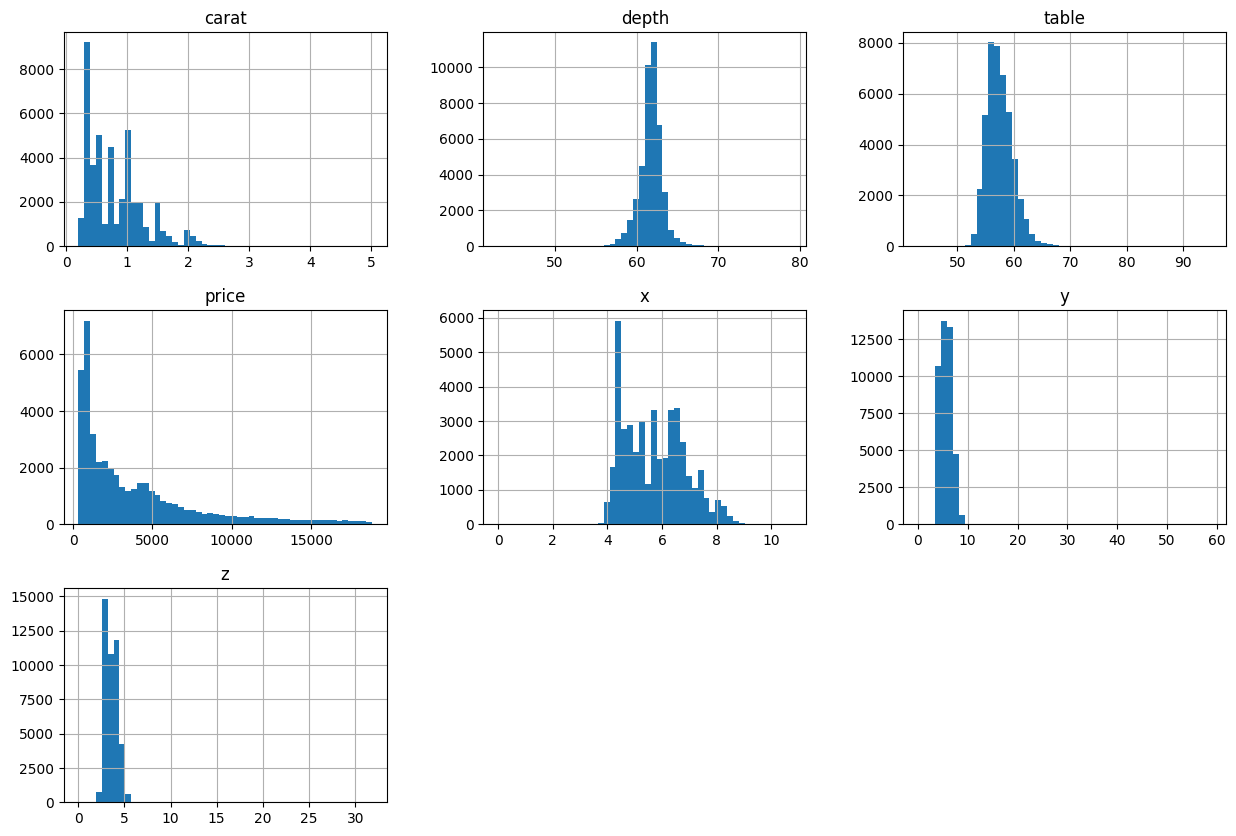

In [ ]:
df.drop('Id', axis=1).hist(figsize=(15,10), bins=50)

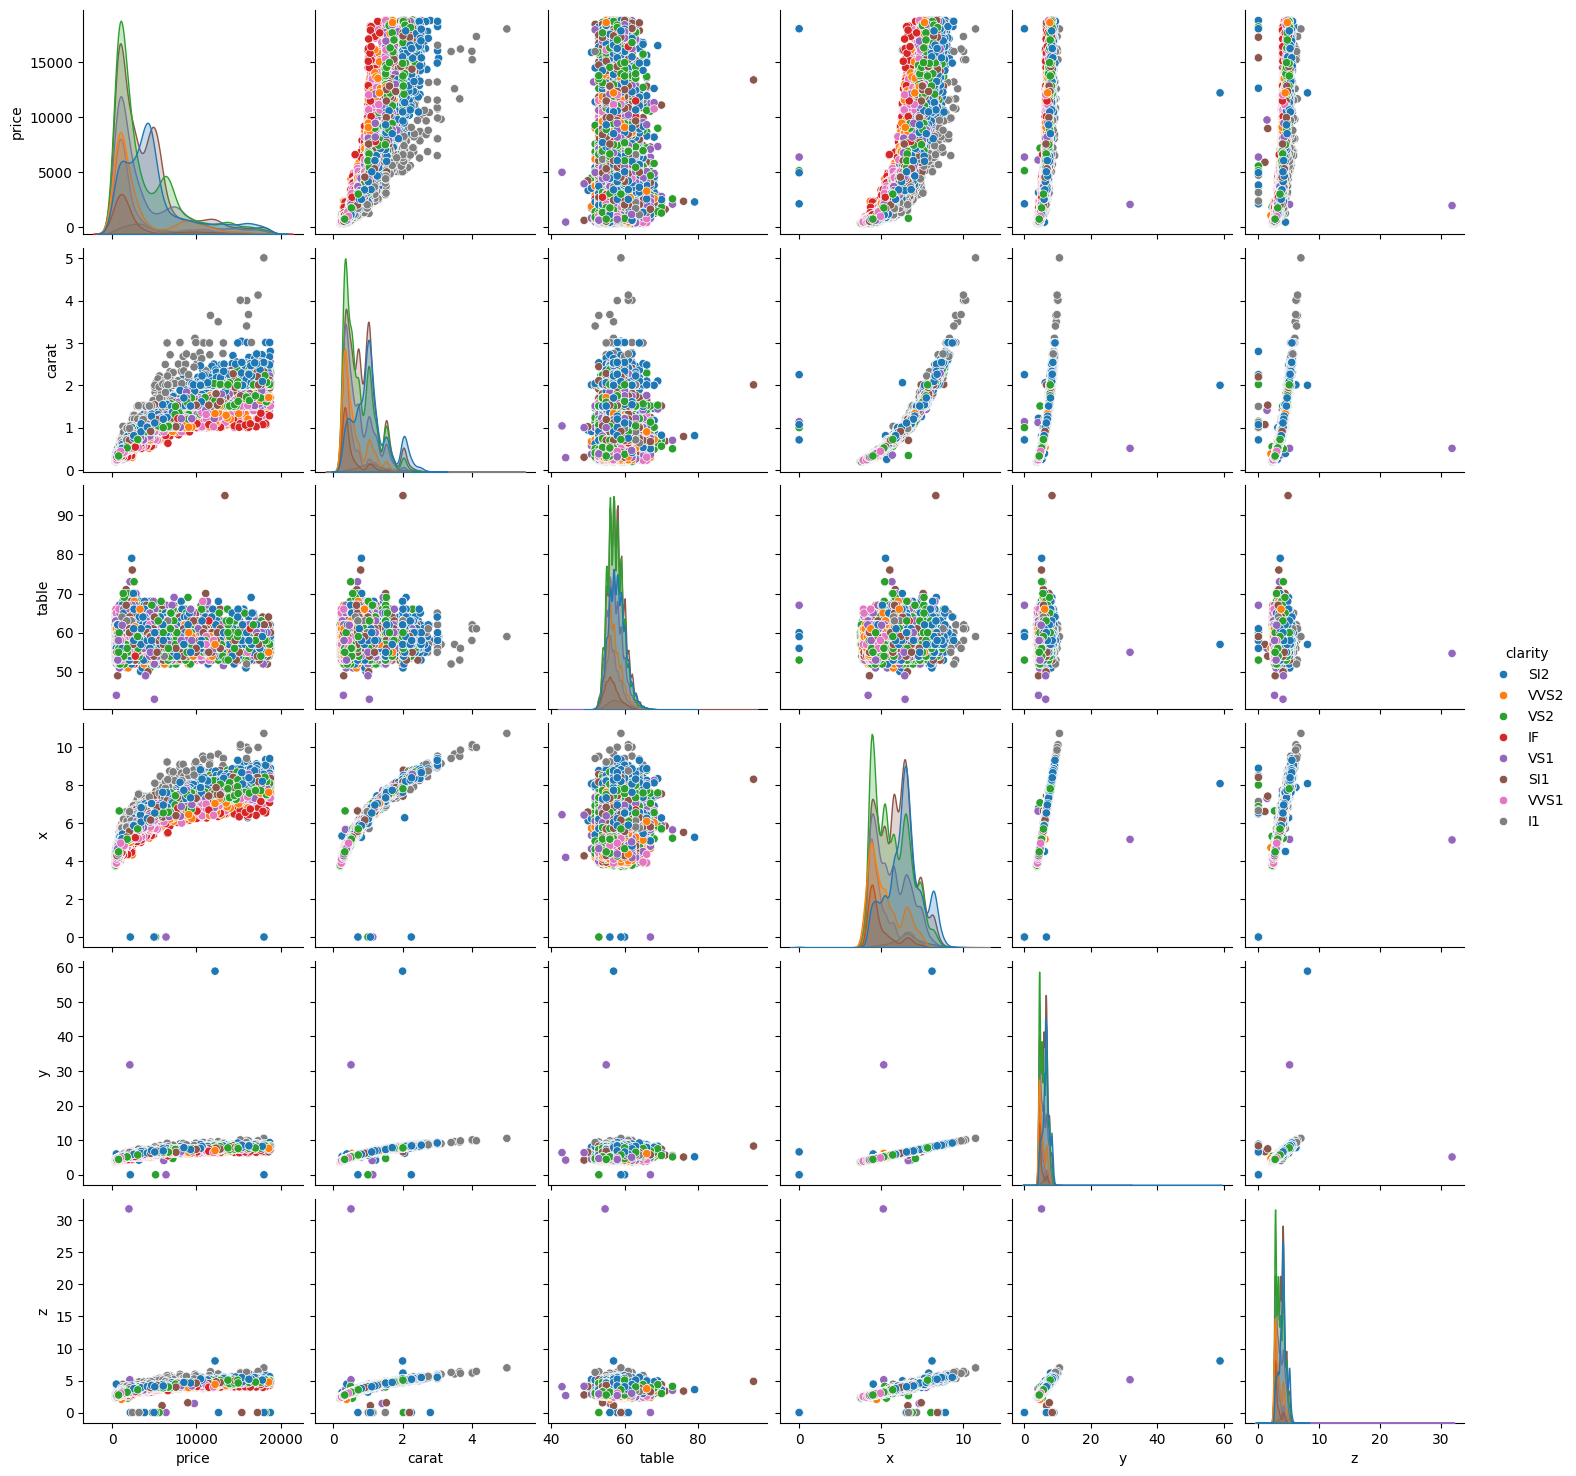

In [ ]:
attributes = ["price" ,"carat", "table", "x", "y", "z", "cut"]
sns.pairplot(data=df[attributes], hue="cut")

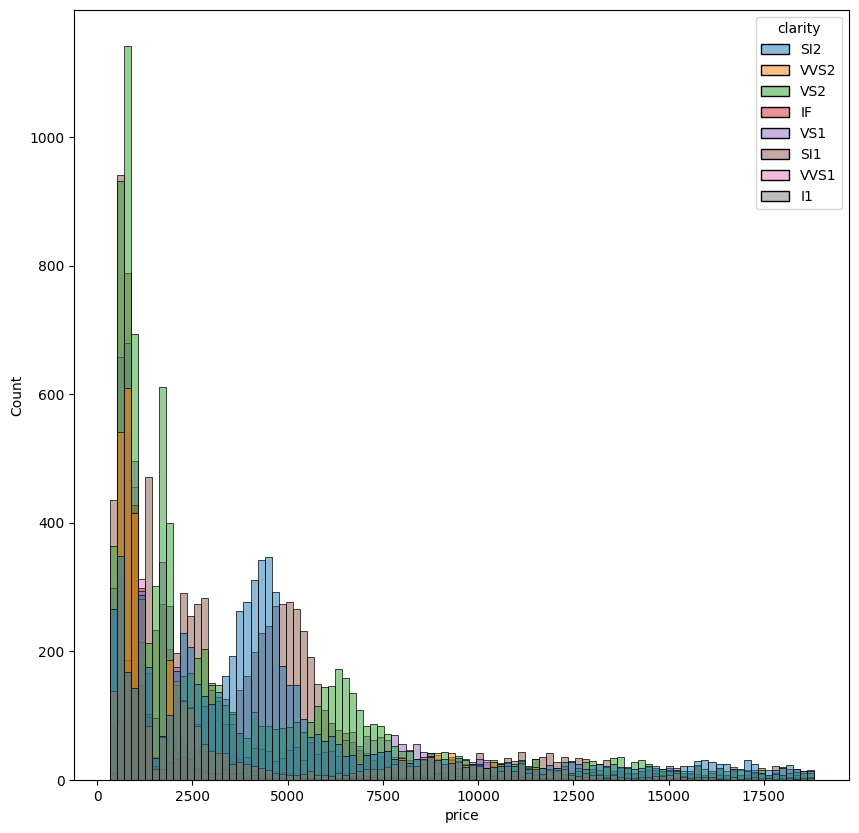

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.histplot(data=df, x='price', hue='clarity', label='Diamond Price', bins=100)

<Axes: >

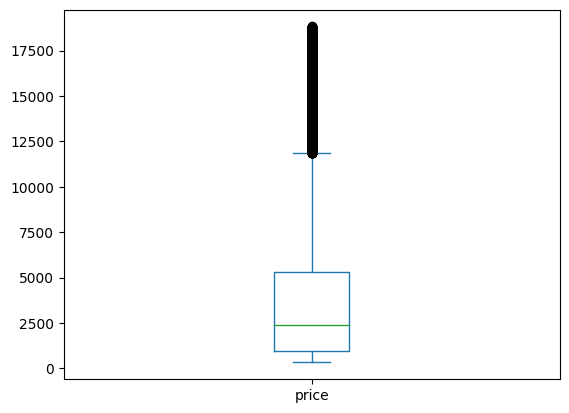

In [ ]:
df['price'].plot(kind='box')

**Categorical columns visualization**

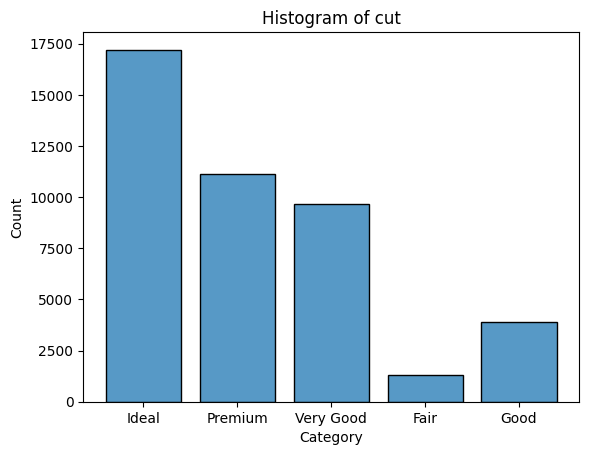

In [ ]:
sns.histplot(data=df, x='cut', shrink=0.8)
plt.title('Histogram of cut')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

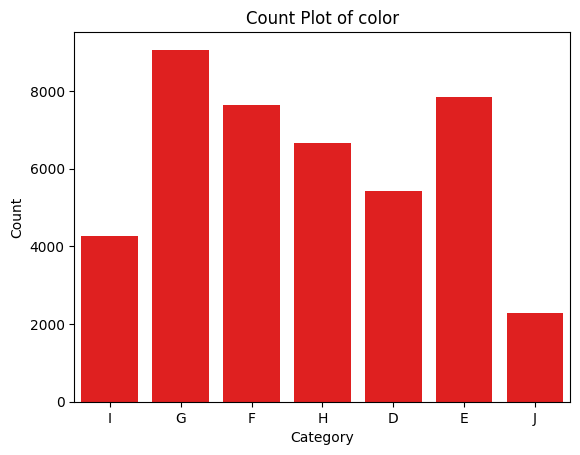

In [ ]:
sns.countplot(data=df, x='color' ,  color='red')
plt.title('Count Plot of color')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

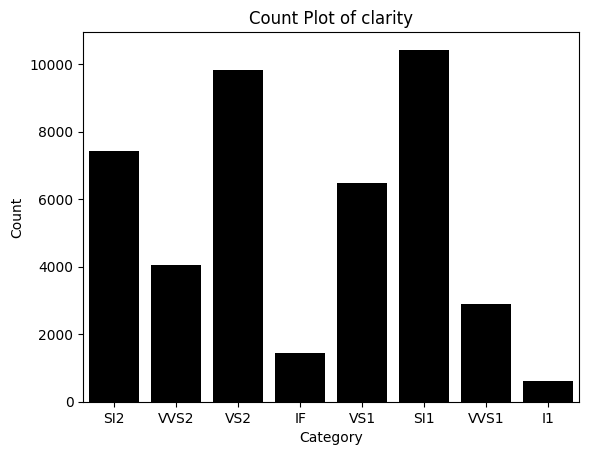

In [ ]:
sns.countplot(data=df, x='clarity',  color='black')
plt.title('Count Plot of clarity')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()



**Dealing with outliers**

**Adding size column and removing x,y,z columns**

In [26]:
df['size']=df['x']*df['y']*df['z']

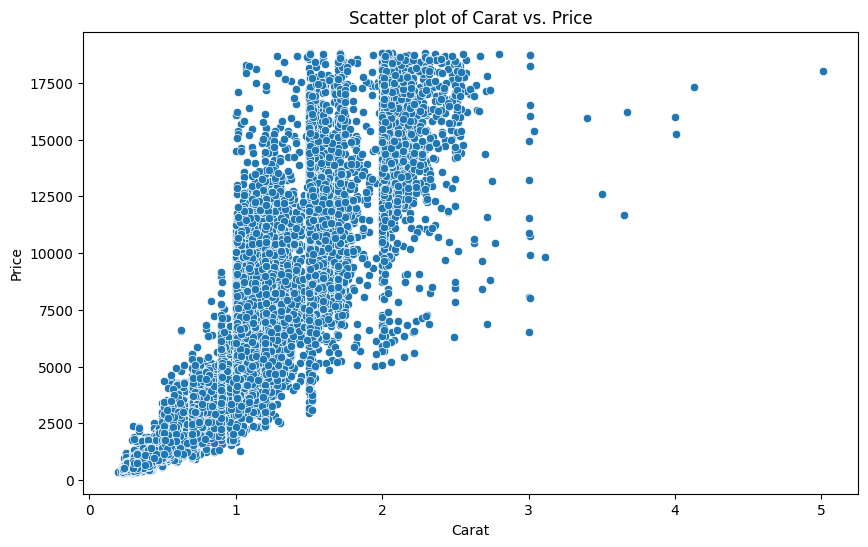

In [5]:
# Scatter plot of Carat vs. Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='carat', y='price', data=df)
plt.title('Scatter plot of Carat vs. Price')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.show()

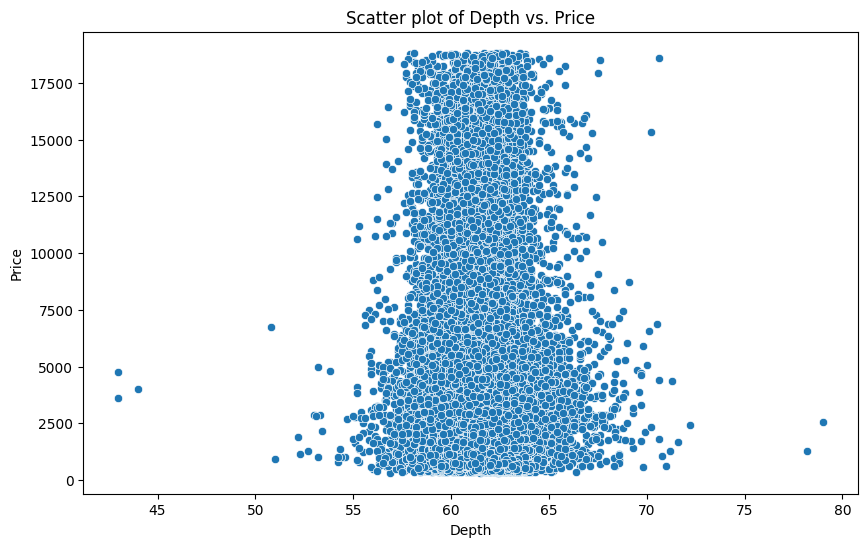

In [ ]:
# Scatter plot of Depth vs. Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='depth', y='price', data=df)
plt.title('Scatter plot of Depth vs. Price')
plt.xlabel('Depth')
plt.ylabel('Price')
plt.show()

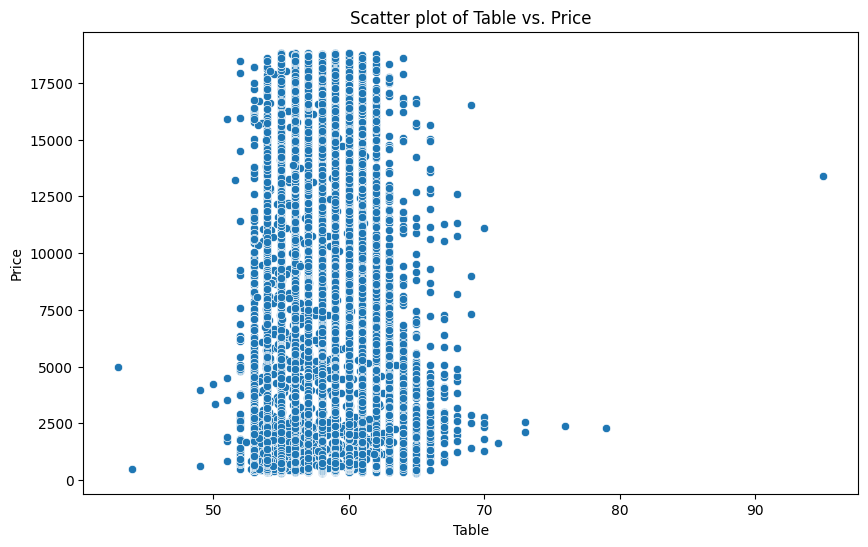

In [ ]:
# Scatter plot of Table vs. Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='table', y='price', data=df)
plt.title('Scatter plot of Table vs. Price')
plt.xlabel('Table')
plt.ylabel('Price')
plt.show()

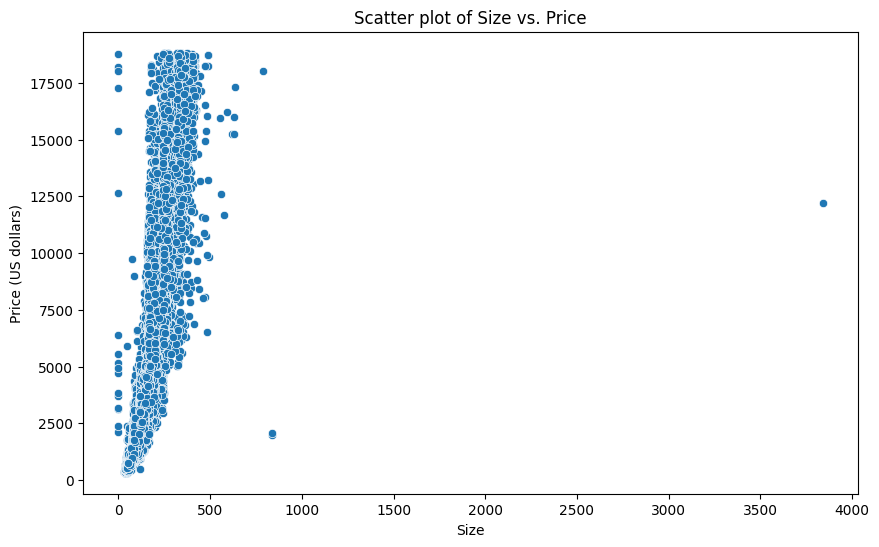

In [8]:
# Scatter plot of Size vs. Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='size', y='price', data=df)
plt.title('Scatter plot of Size vs. Price')
plt.xlabel('Size')
plt.ylabel('Price (US dollars)')
plt.show()

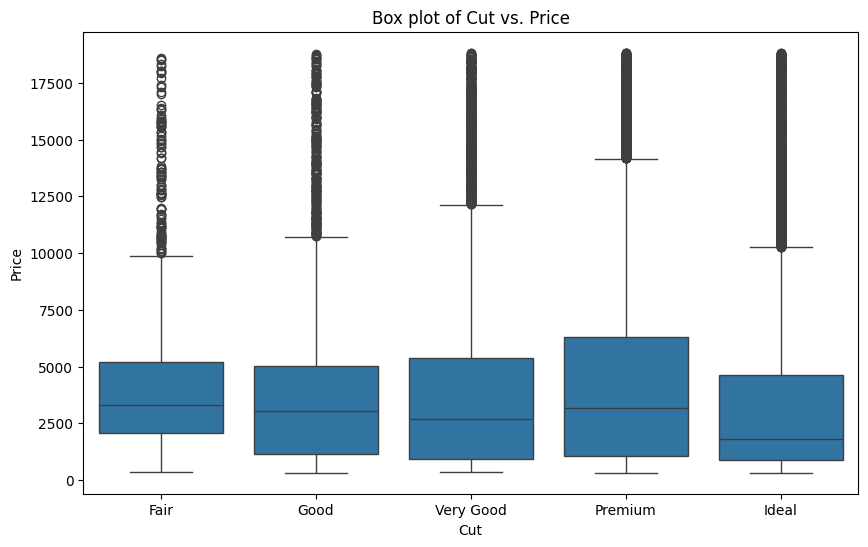

In [ ]:
# Box plot of Cut vs. Price
plt.figure(figsize=(10, 6))
sns.boxplot(x='cut', y='price', data=df, order=['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'])
plt.title('Box plot of Cut vs. Price')
plt.xlabel('Cut')
plt.ylabel('Price')
plt.show()

In [9]:
# Define criteria for identifying outliers for each column separately
threshold_carat = 5  # Example threshold for the 'carat' column
threshold_depth1 = 75
threshold_depth2 = 45  # Example threshold for the 'depth' column
threshold_table = 80
threshold_size = 3500  # Example threshold for the 'table' column
# Define thresholds for other columns as needed

# Filter the data to remove outliers for each column separately
df_clean = df[(df['carat'] <= threshold_carat) &
              (df['depth'] <= threshold_depth1) &
              (df['depth'] >= threshold_depth2) &
              (df['size'] <= threshold_size) &
              (df['table'] <= threshold_table)]
# Add conditions for other columns as needed

# Check the shape of the cleaned dataset to see how many outliers were removed
print("Original dataset shape:", df.shape)
print("Cleaned dataset shape:", df_clean.shape)


Original dataset shape: (43152, 12)
Cleaned dataset shape: (43144, 12)


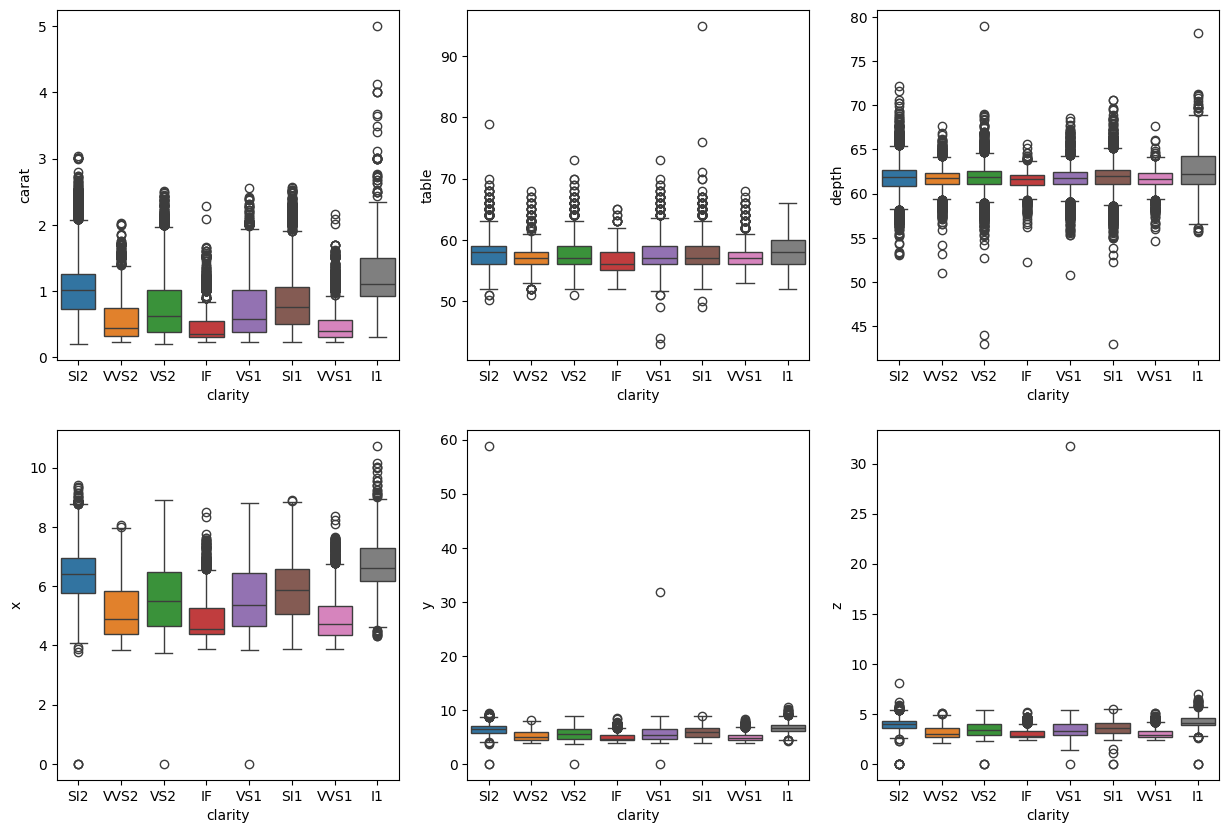

In [ ]:
# Outliers overview based on boxplot, according to clarity categories.
fig = plt.figure(figsize=(15,10))
sub1 = fig.add_subplot(2,3,1)
sub1 = sns.boxplot(x=df.clarity, y=df.carat, hue=df.clarity)

sub1 = fig.add_subplot(2,3,2)
sub1 = sns.boxplot(x=df.clarity, y=df.table, hue=df.clarity)

sub1 = fig.add_subplot(2,3,3)
sub1 = sns.boxplot(x=df.clarity, y=df.depth, hue=df.clarity)

sub2 = fig.add_subplot(2,3,4)
sub2 = sns.boxplot(x=df.clarity, y=df.x, hue=df.clarity)

sub3 = fig.add_subplot(2,3,5)
sub3 = sns.boxplot(x=df.clarity, y=df.y, hue=df.clarity)

sub4 = fig.add_subplot(2,3,6)
sub4 = sns.boxplot(x=df.clarity, y=df.z, hue=df.clarity)

**Z-score method**

In [ ]:
# Calculating the upper limit and the lower limit in every numerical column to detect the outliers.
# first in "carat"
upper_limit = df['carat'].mean() + 3 * df['carat'].std()
lower_limit  = df['carat'].mean()  - 3 * df['carat'].std()
print('upper_limit is: ', upper_limit)
print('lowe_limit is: ',lower_limit)

upper_limit is:  2.218635891857435
lowe_limit is:  -0.6229258436557294


In [ ]:
# the same for other columns:
upper_depth = df['depth'].mean() + 3 * df['depth'].std()
lower_depth  = df['depth'].mean()  - 3 * df['depth'].std()
print('upper_depth is: ', upper_depth)
print('lowe_depth is: ',lower_depth, '\n')

upper_table = df['table'].mean() + 3 * df['table'].std()
lower_table  = df['table'].mean()  - 3 * df['table'].std()
print('upper_table is: ', upper_table)
print('lowe_table is: ',lower_table, '\n')

upper_X = df['x'].mean() + 3 * df['x'].std()
lower_x = df['x'].mean()  - 3 * df['x'].std()
print('upper_x is: ', upper_X)
print('lowe_x is: ',lower_x, '\n')

upper_y = df['y'].mean() + 3 * df['y'].std()
lower_y = df['y'].mean()  - 3 * df['y'].std()
print('upper_y is: ', upper_y)
print('lowe_y is: ',lower_y, '\n')

upper_z = df['z'].mean() + 3 * df['z'].std()
lower_z = df['z'].mean()  - 3 * df['z'].std()
print('upper_z is: ', upper_z)
print('lowe_z is: ',lower_z, '\n')

upper_depth is:  66.05353904280265
lowe_depth is:  57.440815795907014 

upper_table is:  64.1600587621826
lowe_table is:  50.756635713160385 

upper_x is:  9.095404822963776
lowe_x is:  2.3677310687677777 

upper_y is:  9.181443559517515
lowe_y is:  2.2885916648058062 

upper_z is:  5.663280925657569
lowe_z is:  1.413854317204871 



In [ ]:
# Removing outliers:
newdf = df.loc[(df['carat'] < upper_limit) & (df['carat'] > lower_limit)]
print("the outlier in carat: ",len(df) - len(newdf))

new_len = len(newdf)
newdf = newdf.loc[(newdf['depth'] < upper_depth) & (newdf['depth'] > lower_depth)]
print("the outlier in depth: ", new_len - len(newdf))

new_len = len(newdf)
newdf = newdf.loc[(newdf['table'] < upper_table) & (newdf['table'] > lower_table)]
print("the outlier in table: ", new_len - len(newdf))

new_len = len(newdf)
newdf = newdf.loc[(newdf['x'] < upper_X) & (newdf['x'] > lower_x)]
print("the outlier in x: ", new_len - len(newdf))

new_len = len(newdf)
newdf = newdf.loc[(newdf['y'] < upper_y) & (newdf['y'] > lower_y)]
print("the outlier in y: ", new_len - len(newdf))

new_len = len(newdf)
newdf = newdf.loc[(newdf['z'] < upper_z) & (newdf['z'] > lower_z)]
print("the outlier in z: ", new_len - len(newdf))

the outlier in carat:  346
the outlier in depth:  543
the outlier in table:  204
the outlier in x:  3
the outlier in y:  2
the outlier in z:  14


In [ ]:
outliers_count = len(df) - len(newdf)
outliers_count

1112

In [ ]:
newdf.to_csv('df_k.csv', index=False)

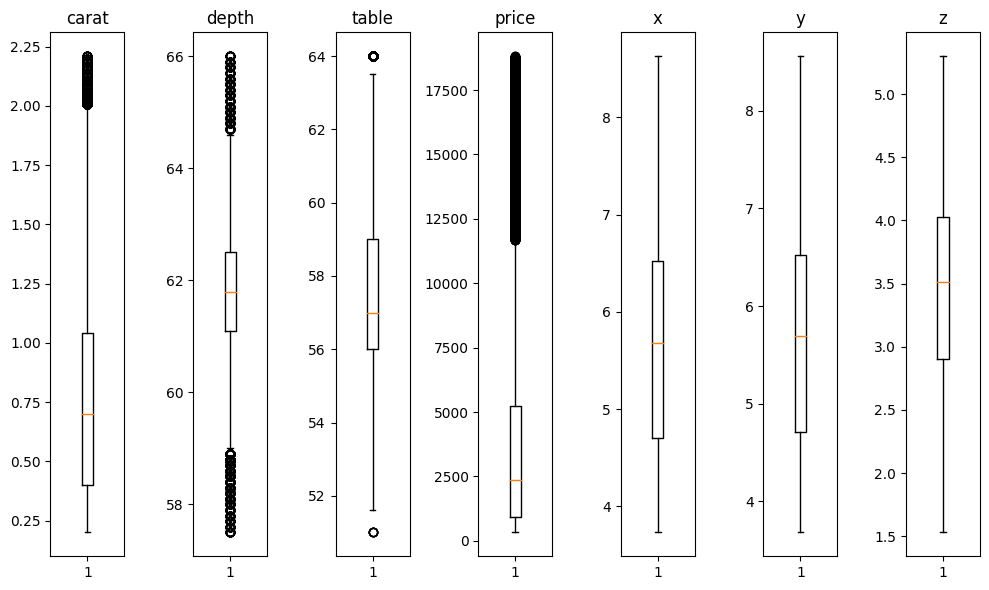

In [ ]:
rows = 1
numeric_columns = newdf.drop('Id',axis=1).select_dtypes(include=['float64', 'int64']).columns
cols = len(numeric_columns)
fig, axes = plt.subplots(rows, cols, figsize=(10, 6))

for i, column in enumerate(numeric_columns):
    ax = axes[i] if cols > 1 else axes  # التعامل مع عدد الأعمدة
    ax.boxplot(newdf[column])
    ax.set_title(column)

plt.tight_layout()
plt.show()

In [ ]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42040 entries, 0 to 43151
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       42040 non-null  int64  
 1   carat    42040 non-null  float64
 2   cut      42040 non-null  object 
 3   color    42040 non-null  object 
 4   clarity  42040 non-null  object 
 5   depth    42040 non-null  float64
 6   table    42040 non-null  float64
 7   price    42040 non-null  int64  
 8   x        42040 non-null  float64
 9   y        42040 non-null  float64
 10  z        42040 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.8+ MB



**Other way to remove outliers**

In [ ]:
df_r = df[(df['carat'] <= 1.9)]
print("the outlier in carat: ",len(df) - len(df_r))

new_len = len(df_r)
df_r= df_r[(df_r['depth'] >= 59.5) & (df_r['depth'] <= 64.5)]
print("the outlier in depth: ", new_len - len(df_r))

new_len = len(df_r)
df_r = df_r[(df_r['table'] >= 53) & (df_r['table'] <= 61)]
print("the outlier in table: ", new_len - len(df_r))

new_len = len(df_r)
df_r = df_r[(df_r['price'] <= 10000)]
print("the outlier in price: ", new_len - len(df_r))

new_len = len(df_r)
df_r = df_r[(df_r['x'] < 10) & (df_r['x'] > 1)]
print("the outlier in x: ", new_len - len(df_r))

new_len = len(df_r)
df_r = df_r[(df_r['y'] < 10) & (df_r['x'] > 1)]
print("the outlier in y: ", new_len - len(df_r))

new_len = len(df_r)
df_r = df_r[(df_r['z'] < 10) & (df_r['x'] > 1)]
print("the outlier in z: ", new_len - len(df_r))

the outlier in carat:  1758
the outlier in depth:  3258
the outlier in table:  1230
the outlier in price:  2298
the outlier in x:  3
the outlier in y:  1
the outlier in z:  1


In [ ]:
outliers_count = len(df) - len(df_r)
outliers_count

8549

In [ ]:
df_r.to_csv('df_r.csv', index=False)

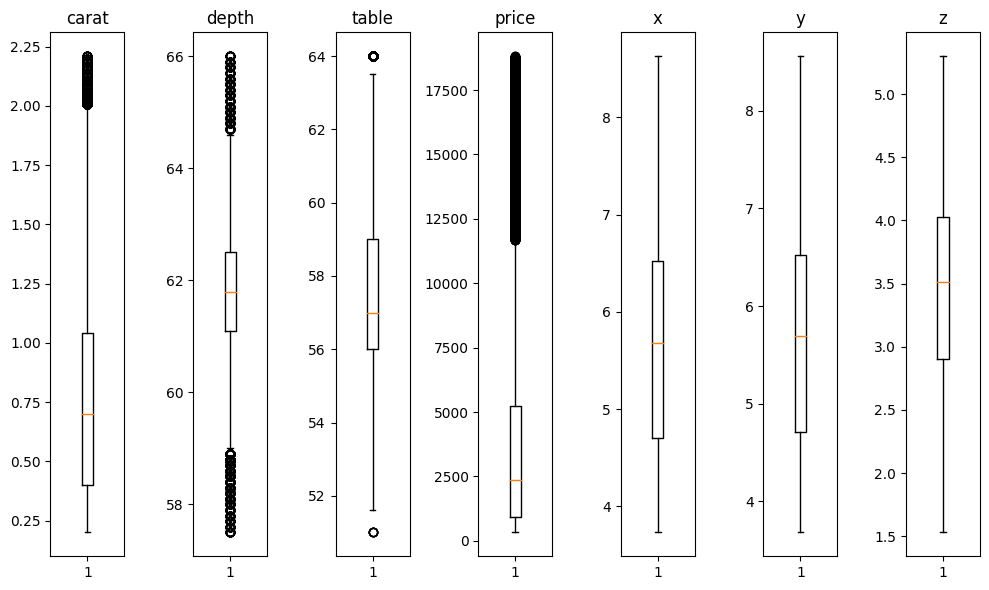

In [ ]:
rows = 1
numeric_columns = newdf.drop('Id',axis=1).select_dtypes(include=['float64', 'int64']).columns
cols = len(numeric_columns)
fig, axes = plt.subplots(rows, cols, figsize=(10, 6))

for i, column in enumerate(numeric_columns):
    ax = axes[i] if cols > 1 else axes  # التعامل مع عدد الأعمدة
    ax.boxplot(newdf[column])
    ax.set_title(column)

plt.tight_layout()
plt.show()

In [ ]:
df_r.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34603 entries, 0 to 43151
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       34603 non-null  int64  
 1   carat    34603 non-null  float64
 2   cut      34603 non-null  object 
 3   color    34603 non-null  object 
 4   clarity  34603 non-null  object 
 5   depth    34603 non-null  float64
 6   table    34603 non-null  float64
 7   price    34603 non-null  int64  
 8   x        34603 non-null  float64
 9   y        34603 non-null  float64
 10  z        34603 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.2+ MB


# **Correlation check**

**Original data**

In [12]:
df_cm = df.select_dtypes(['float64', 'int64']).corr()
# correlation_matrix = df.corr(numeric_only=True)
df_cm['price'].sort_values(ascending=False)

price    1.000000
carat    0.921911
size     0.897903
x        0.885181
y        0.861354
z        0.857665
table    0.128501
Id      -0.001111
depth   -0.013137
Name: price, dtype: float64

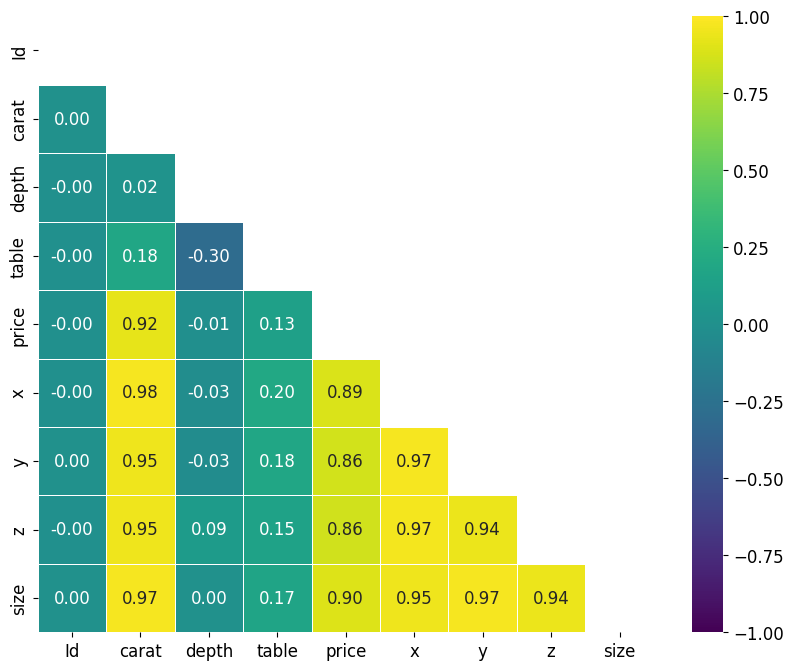

In [13]:
# Create a mask using numpy's triu function
mask = np.triu(np.ones_like(df_cm, dtype=bool))

plt.figure(figsize = (10,8))
plt.rcParams.update({'font.size': 12})
sns.heatmap(df_cm, cmap = 'viridis', vmin = -1, vmax = 1, center = 0, annot=True, fmt=".2f", square=True, linewidths=.5, mask = mask)
plt.show()

**Cleaned data without outliers (Z-score method)**

In [ ]:
newdf_cm = newdf.select_dtypes(['float64', 'int64']).corr()
newdf_cm['price'].sort_values(ascending=False)

price    1.000000
carat    0.923073
y        0.885971
x        0.884542
z        0.880871
table    0.135105
Id      -0.006359
depth   -0.017288
Name: price, dtype: float64

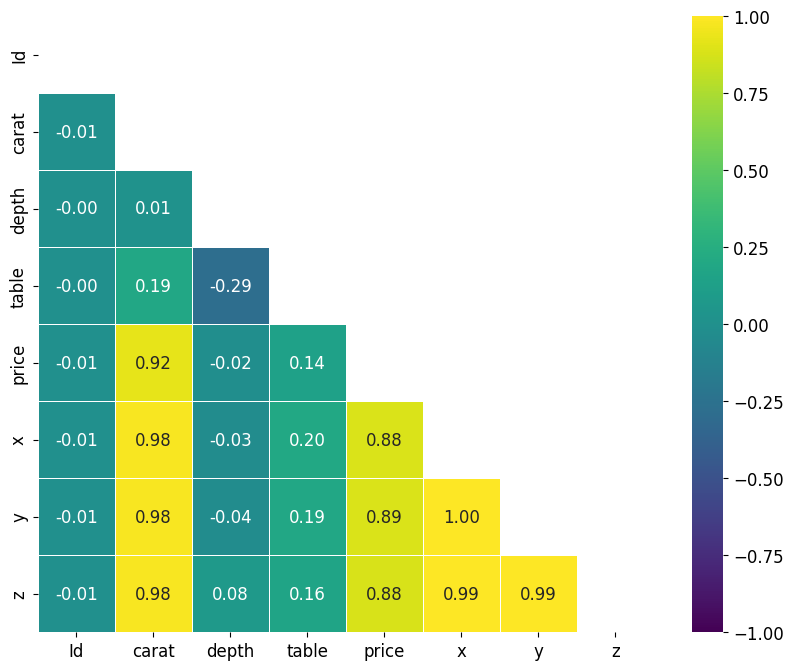

In [ ]:
# Create a mask using numpy's triu function
mask = np.triu(np.ones_like(df_cm, dtype=bool))

plt.figure(figsize = (10,8))
plt.rcParams.update({'font.size': 12})
sns.heatmap(newdf_cm, cmap = 'viridis', vmin = -1, vmax = 1, center = 0, annot=True, fmt=".2f", square=True, linewidths=.5, mask = mask)
plt.show()

**Cleaned data without outliers (method 2)**

In [ ]:
df_r_cm = df_r.select_dtypes(['float64', 'int64']).corr()
df_r_cm['price'].sort_values(ascending=False)

price    1.000000
carat    0.929284
y        0.911673
x        0.910817
z        0.905757
table    0.148538
depth    0.030980
Id      -0.002747
Name: price, dtype: float64

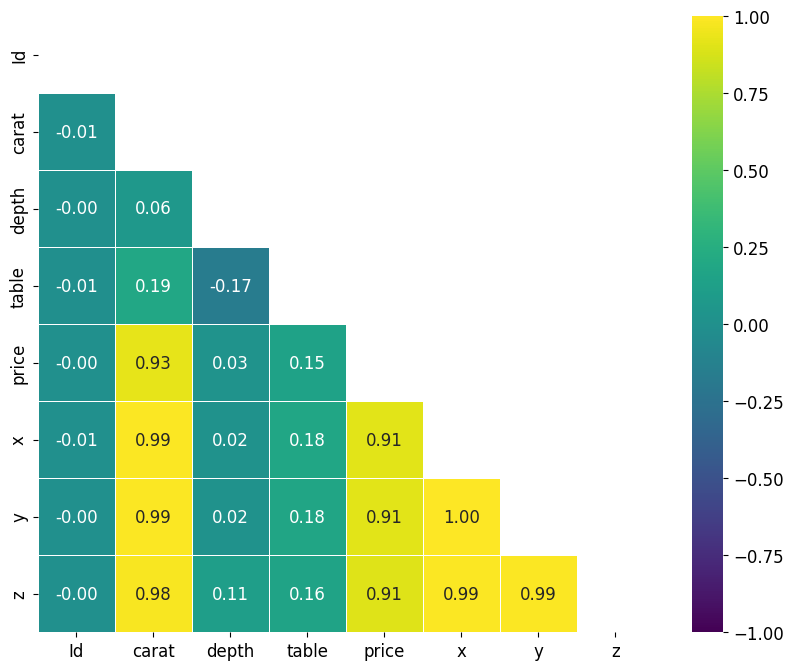

In [ ]:
# Create a mask using numpy's triu function
mask = np.triu(np.ones_like(df_cm, dtype=bool))

plt.figure(figsize = (10,8))
plt.rcParams.update({'font.size': 12})
sns.heatmap(df_r_cm, cmap = 'viridis', vmin = -1, vmax = 1, center = 0, annot=True, fmt=".2f", square=True, linewidths=.5, mask = mask)
plt.show()

# **Feature Engineering**

**Adding size column and removing x,y,z columns**

In [15]:
df['size']=df['x']*df['y']*df['z']

In [ ]:
newdf['size']=newdf['x']*newdf['y']*newdf['z']
df_r['size']=df_r['x']*df_r['y']*df_r['z']

NameError: name 'newdf' is not defined

In [ ]:
# checking the correlation between the price column and the rest features,
# the correlation between the size and the price is higher than the other correlations.
newdf_cm = newdf.select_dtypes(['float64', 'int64']).corr()
newdf_cm['price'].sort_values(ascending=False)

price         1.000000
size          0.924465
carat         0.923073
y             0.885971
x             0.884542
z             0.880871
table         0.135105
Unnamed: 0   -0.006359
Id           -0.006359
depth        -0.017288
Name: price, dtype: float64

In [ ]:
df_r_cm = df_r.select_dtypes(['float64', 'int64']).corr()
df_r_cm['price'].sort_values(ascending=False)

price         1.000000
size          0.929699
carat         0.929284
y             0.911673
x             0.910817
z             0.905757
table         0.148538
depth         0.030980
Unnamed: 0   -0.002747
Id           -0.002747
Name: price, dtype: float64

In [ ]:
# removing x,y,z columns
newdf.drop([ 'x' , 'y' ,'z'], axis=1, inplace=True)
df_r.drop([ 'x' , 'y' ,'z'], axis=1, inplace=True)

**Splitting the data into train and test**

In [ ]:
# Split original data
X = df.drop(['price', 'Id'], axis=1)
y = df['price']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Split data 1
X1 = newdf.drop(['price', 'Id'], axis=1)
y1 = newdf['price']
x1_train, x1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [ ]:
# Split data 2
X2 = df_r.drop(['price', 'Id'], axis=1)
y2 = df_r['price']
x2_train, x2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

**Feature transformation**

In [24]:
df_clean.head()

,Id,carat,cut,color,clarity,depth,table,price,x,y,z,size
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07,176.483340
1,2,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51,246.965796
2,3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71,52.943373
3,4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19,86.422842
4,5,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50,115.315200


In [27]:
# Split data 2
X3 = df_clean.drop(['price', 'Id'], axis=1)
y3 = df_clean['price']
x3_train, x3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

In [ ]:
# original data
lr_cut = LabelEncoder()
lr_clarity = LabelEncoder()
x_train[['cut']] = x_train[['cut']].apply(lr_cut.fit_transform)
x_train[['clarity']] = x_train[['clarity']].apply(lr_clarity.fit_transform)
x_test[['cut']] = x_test[['cut']].apply(lr_cut.transform)
x_test[['clarity']] = x_test[['clarity']].apply(lr_clarity.transform)

data_num = x_train.select_dtypes(np.number).columns
num_attribs = list(data_num)
cat_attribs = ['color']

full_pipeline = ColumnTransformer([
  ("num", StandardScaler(), num_attribs),
  ("cat_non_ord",OneHotEncoder(), cat_attribs),
])

X_train_prepared = full_pipeline.fit_transform(x_train)
X_test_prepared = full_pipeline.transform(x_test)

In [ ]:
# data 1
lr1_cut = LabelEncoder()
lr1_clarity = LabelEncoder()
x1_train[['cut']] = x1_train[['cut']].apply(lr1_cut.fit_transform)
x1_train[['clarity']] = x1_train[['clarity']].apply(lr1_clarity.fit_transform)
x1_test[['cut']] = x1_test[['cut']].apply(lr1_cut.transform)
x1_test[['clarity']] = x1_test[['clarity']].apply(lr1_clarity.transform)

data_num = x1_train.select_dtypes(np.number).columns
num_attribs = list(data_num)
cat_attribs = ['color']

full_pipeline = ColumnTransformer([
  ("num", StandardScaler(), num_attribs),
  ("cat_non_ord",OneHotEncoder(), cat_attribs),
])

X1_train_prepared = full_pipeline.fit_transform(x1_train)
X1_test_prepared = full_pipeline.transform(x1_test)

In [ ]:
# data 2
cat_ord_attribs = ['cut', 'clarity']
lr2 = LabelEncoder()
x2_train[cat_ord_attribs] = x2_train[cat_ord_attribs].apply(lr2.fit_transform)
x2_test[cat_ord_attribs] = x2_test[cat_ord_attribs].apply(lr2.transform)

data_num = x2_train.select_dtypes(np.number).columns
num_attribs = list(data_num)
cat_attribs = ['color']

full_pipeline = ColumnTransformer([
  ("num", MinMaxScaler(), num_attribs),
  ("cat_non_ord",OneHotEncoder(), cat_attribs),
])

X2_train_prepared = full_pipeline.fit_transform(x2_train)
X2_test_prepared = full_pipeline.transform(x2_test)

In [28]:
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Ensure all categorical columns are strings
x3_train['cut'] = x3_train['cut'].astype(str)
x3_train['clarity'] = x3_train['clarity'].astype(str)
x3_train['color'] = x3_train['color'].astype(str)
x3_test['cut'] = x3_test['cut'].astype(str)
x3_test['clarity'] = x3_test['clarity'].astype(str)
x3_test['color'] = x3_test['color'].astype(str)

# Define the order of categories for each ordinal feature
cut_categories = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
clarity_categories = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
color_categories = ['J', 'I', 'H', 'G', 'F', 'E', 'D']

# Create an OrdinalEncoder with these categories
ordinal_encoder = OrdinalEncoder(categories=[cut_categories, clarity_categories, color_categories])

# Fit and transform the ordinal features
x3_train[['cut', 'clarity', 'color']] = ordinal_encoder.fit_transform(x3_train[['cut', 'clarity', 'color']])
x3_test[['cut', 'clarity', 'color']] = ordinal_encoder.transform(x3_test[['cut', 'clarity', 'color']])

# Identify numeric attributes
data_num = x3_train.select_dtypes(np.number).columns
num_attribs = list(data_num)

# Create the full pipeline for data transformation
full_pipeline = ColumnTransformer([
  ("num", StandardScaler(), num_attribs),
])

# Apply the pipeline to the training and test data
X_train_prepared = full_pipeline.fit_transform(x3_train)
X_test_prepared = full_pipeline.transform(x3_test)

print(X_train_prepared[:5])  # Verify the transformation
print(X_test_prepared[:5])  # Verify the transformation


[[-0.88443491  0.98078231  0.34580173 -0.02750175  0.46000977 -1.5549166
  -0.96587623 -1.01237089 -0.91275734 -0.88908751]
 [-1.03232348  0.0860158   0.93279561 -0.63364667 -1.7207748   0.68745922
  -1.17092344 -1.11932672 -1.26401372 -1.01369852]
 [-0.16611901 -0.80875071 -0.82818604 -0.63364667 -0.17312123 -0.65796627
   0.03261456  0.05718747  0.02860976 -0.14042097]
 [-1.05345041  0.98078231  1.5197895  -0.63364667 -0.52486068 -0.20949111
  -1.25115931 -1.28867346 -1.27806398 -1.05839414]
 [-0.90556185  0.98078231  0.93279561  0.57864317 -0.3841649  -0.65796627
  -0.97479132 -0.94997998 -0.96895836 -0.88988448]]
[[-1.20133898 -0.80875071  0.93279561  1.79093301 -0.31381701  1.13593438
  -1.58993296 -1.53823708 -1.54501883 -1.1916884 ]
 [-0.60978471  0.0860158   0.93279561 -1.23979159 -1.0172959  -0.65796627
  -0.45771574 -0.4865047  -0.56150096 -0.58541   ]
 [ 0.34092751  0.0860158  -1.41517992 -1.23979159 -0.31381701  1.13593438
   0.6388411   0.45827185  0.50631844  0.35692969]


In [29]:
print(x3_train['cut'].unique())
print(x3_train['clarity'].unique())
print(x3_train['color'].unique())


[4. 3. 2. 0. 1.]
[3. 2. 4. 5. 6. 1. 0. 7.]
[4. 5. 2. 6. 3. 1. 0.]


In [30]:
X_train_prepared[3][:]

array([-1.05345041,  0.98078231,  1.5197895 , -0.63364667, -0.52486068,
       -0.20949111, -1.25115931, -1.28867346, -1.27806398, -1.05839414])

In [ ]:
oh = OneHotEncoder()
oh.fit(x_train[['color']])
oh.categories_

[array(['D', 'E', 'F', 'G', 'H', 'I', 'J'], dtype=object)]

In [ ]:
df_col_names = ['carat', 'cut','clarity', 'depth', 'table','size', 'D', 'E', 'F', 'G', 'H', 'I', 'J' ]
X_train_prepared = pd.DataFrame(X_train_prepared, columns=df_col_names)
X_test_prepared = pd.DataFrame(X_test_prepared, columns=df_col_names)

X1_train_prepared = pd.DataFrame(X1_train_prepared, columns=df_col_names)
X1_test_prepared = pd.DataFrame(X1_test_prepared, columns=df_col_names)

X_train_prepared.head()

,carat,cut,clarity,depth,table,size,D,E,F,G,H,I,J
0,1.582808,0.431553,0.098463,0.591302,0.687438,1.581266,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.509649,0.431553,-2.221692,0.312642,0.239182,0.466907,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.888411,0.431553,0.678501,0.033982,0.239182,0.925406,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-0.605595,-0.538094,-1.641653,0.591302,-0.657331,-0.598861,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.816019,-0.538094,-1.061615,0.242977,-1.553844,-0.803415,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [34]:
#X1_train = X1_train_prepared
#X1_test = X1_test_prepared

X_train = X_train_prepared
X_test = X_test_prepared
y_train =y3_train
y_test= y3_test

# **Modelling**

## Linear regression models

**LinearRegression**

Original data

In [ ]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)
train_score = linear_model.score(X_train, y_train)
test_score = linear_model.score(X_test, y_test)

print('Linear Regression model score using train set is: ', round(train_score, 3))
print('Linear Regression model score using train set is: ',  round(test_score, 3))

Linear Regression model score using train set is:  0.884
Linear Regression model score using train set is:  0.884


In [ ]:
RMSE_linear = mean_squared_error(y_test, y_pred, squared=False)
RMSE_linear

1339.5885470184865

data 1

In [ ]:
linear_model = LinearRegression()
linear_model.fit(X1_train, y1_train)
y_pred = linear_model.predict(X1_test)
train_score = linear_model.score(X1_train, y1_train)
test_score = linear_model.score(X1_test, y1_test)

print('Linear Regression model score using train set is: ', round(train_score, 3))
print('Linear Regression model score using train set is: ',  round(test_score, 3))

Linear Regression model score using train set is:  0.889
Linear Regression model score using train set is:  0.883


In [ ]:
RMSE_linear = mean_squared_error(y1_test, y_pred, squared=False)
RMSE_linear

1319.743351142426

data 2

In [ ]:
linear_model = LinearRegression()
linear_model.fit(X2_train, y2_train)
y_pred = linear_model.predict(X2_test)
train_score = linear_model.score(X2_train, y2_train)
test_score = linear_model.score(X2_test, y2_test)

print('Linear Regression model score using train set is: ', round(train_score, 3))
print('Linear Regression model score using train set is: ',  round(test_score, 3))

Linear Regression model score using train set is:  0.896
Linear Regression model score using train set is:  0.9


In [ ]:
RMSE_linear = mean_squared_error(y2_test, y_pred, squared=False)
RMSE_linear

753.9819814743975

data 3

In [35]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)
train_score = linear_model.score(X_train, y_train)
test_score = linear_model.score(X_test, y_test)

print('Linear Regression model score using train set is: ', round(train_score, 3))
print('Linear Regression model score using train set is: ',  round(test_score, 3))

Linear Regression model score using train set is:  0.909
Linear Regression model score using train set is:  0.912


In [36]:
RMSE_linear = mean_squared_error(y_test, y_pred, squared=False)
RMSE_linear

1186.8777208911717

**Ridge**

Original data


In [ ]:
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)
train_score = ridge_model.score(X_train, y_train)
test_score = ridge_model.score(X_test, y_test)

print('Ridge Regression model score using train set is: ', round(train_score, 3))
print('Ridge Regression model score using train set is: ',  round(test_score, 3))

Ridge Regression model score using train set is:  0.884
Ridge Regression model score using train set is:  0.884


In [ ]:
RMSE_ridge = mean_squared_error(y_test, y_pred, squared=False)
RMSE_ridge

1340.2168310660713

data 1

In [ ]:
ridge_model = Ridge()
ridge_model.fit(X1_train, y1_train)
y_pred = ridge_model.predict(X1_test)
train_score = ridge_model.score(X1_train, y1_train)
test_score = ridge_model.score(X1_test, y1_test)

print('Ridge Regression model score using train set is: ', round(train_score, 3))
print('Ridge Regression model score using train set is: ',  round(test_score, 3))

Ridge Regression model score using train set is:  0.889
Ridge Regression model score using train set is:  0.883


In [ ]:
RMSE_ridge = mean_squared_error(y1_test, y_pred, squared=False)
RMSE_ridge

1319.7467907943385

data 2

In [ ]:
ridge_model = Ridge()
ridge_model.fit(X2_train, y2_train)
y_pred = ridge_model.predict(X2_test)
train_score = ridge_model.score(X2_train, y2_train)
test_score = ridge_model.score(X2_test, y2_test)

print('Ridge Regression model score using train set is: ', round(train_score, 3))
print('Ridge Regression model score using train set is: ',  round(test_score, 3))

Ridge Regression model score using train set is:  0.896
Ridge Regression model score using train set is:  0.901


In [ ]:
RMSE_ridge = mean_squared_error(y2_test, y_pred, squared=False)
RMSE_ridge

753.7735381219145

**Lasso**

Original data

In [ ]:
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)
train_score = lasso_model.score(X_train, y_train)
test_score = lasso_model.score(X_test, y_test)

print('Lasso Regression model score using train set is: ', round(train_score, 3))
print('Lasso Regression model score using train set is: ',  round(test_score, 3))

Lasso Regression model score using train set is:  0.884
Lasso Regression model score using train set is:  0.884


In [ ]:
RMSE_lasso = mean_squared_error(y_test, y_pred, squared=False)
RMSE_lasso

1338.7503586401074

data 1

In [ ]:
lasso_model = Lasso()
lasso_model.fit(X1_train, y1_train)
y_pred = lasso_model.predict(X1_test)
train_score = lasso_model.score(X1_train, y1_train)
test_score = lasso_model.score(X1_test, y1_test)

print('Lasso Regression model score using train set is: ', round(train_score, 3))
print('Lasso Regression model score using train set is: ',  round(test_score, 3))

Lasso Regression model score using train set is:  0.889
Lasso Regression model score using train set is:  0.883


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.530e+08, tolerance: 5.037e+07
  model = cd_fast.enet_coordinate_descent(


In [ ]:
RMSE_lasso = mean_squared_error(y1_test, y_pred, squared=False)
RMSE_lasso

1320.0369235792882

data 2

In [ ]:
lasso_model = Lasso()
lasso_model.fit(X2_train, y2_train)
y_pred = lasso_model.predict(X2_test)
train_score = lasso_model.score(X2_train, y2_train)
test_score = lasso_model.score(X2_test, y2_test)

print('Lasso Regression model score using train set is: ', round(train_score, 3))
print('Lasso Regression model score using train set is: ',  round(test_score, 3))

Lasso Regression model score using train set is:  0.896
Lasso Regression model score using train set is:  0.9


In [ ]:
RMSE_lasso = mean_squared_error(y2_test, y_pred, squared=False)
RMSE_lasso

754.0155154802471

**LogisticRegression**

old data (with x,y,z and without size feature)

In [ ]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)
train_score = logistic_model.score(X_train, y_train)
test_score = logistic_model.score(X_test, y_test)

print('LogisticRegression model score using train set is: ', round(train_score, 3))
print('LogisticRegression model score using train set is: ',  round(test_score, 3))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression model score using train set is:  0.017
LogisticRegression model score using train set is:  0.011


In [ ]:
RMSE_logistic = mean_squared_error(y_test, y_pred, squared=False)
RMSE_logistic

1244.1331489407644

data 1

In [ ]:
logistic_model = LogisticRegression()
logistic_model.fit(X1_train, y1_train)
y_pred = logistic_model.predict(X1_test)
train_score = logistic_model.score(X1_train, y1_train)
test_score = logistic_model.score(X1_test, y1_test)

print('LogisticRegression model score using train set is: ', round(train_score, 3))
print('LogisticRegression model score using train set is: ',  round(test_score, 3))

In [ ]:
RMSE_logistic = mean_squared_error(y1_test, y_pred, squared=False)
RMSE_logistic

data 2

In [ ]:
logistic_model = LogisticRegression()
logistic_model.fit(X2_train, y2_train)
y_pred = logistic_model.predict(X2_test)
train_score = logistic_model.score(X2_train, y2_train)
test_score = logistic_model.score(X2_test, y2_test)

print('LogisticRegression model score using train set is: ', round(train_score, 3))
print('LogisticRegression model score using train set is: ',  round(test_score, 3))

In [ ]:
RMSE_logistic = mean_squared_error(y2_test, y_pred, squared=False)
RMSE_logistic

Data 3

In [37]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)
train_score = logistic_model.score(X_train, y_train)
test_score = logistic_model.score(X_test, y_test)

print('LogisticRegression model score using train set is: ', round(train_score, 3))
print('LogisticRegression model score using train set is: ',  round(test_score, 3))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression model score using train set is:  0.028
LogisticRegression model score using train set is:  0.015


In [38]:
RMSE_logistic = mean_squared_error(y_test, y_pred, squared=False)
RMSE_logistic

1474.7474352573468

## Decision Tree

Original data

In [ ]:
id3 = DecisionTreeRegressor()
id3.fit(X_train,y_train)
y_pred = id3.predict(X_test)
train_score = id3.score(X_train, y_train)
test_score = id3.score(X_test, y_test)

print('DecisionTree Regression model score using train set is: ', round(train_score, 3))
print('DecisionTree Regression model score using train set is: ',  round(test_score, 3))

DecisionTree Regression model score using train set is:  1.0
DecisionTree Regression model score using train set is:  0.966


In [ ]:
RMSE_id3 = mean_squared_error(y_test, y_pred, squared=False)
RMSE_id3

729.180475232145

In [ ]:
feature_importances_id3 = pd.DataFrame(id3.feature_importances_,
                                       index = X_train.columns,
                                       columns = ['importance']).sort_values('importance', ascending=False)
feature_importances_id3['feature'] = feature_importances_id3.index


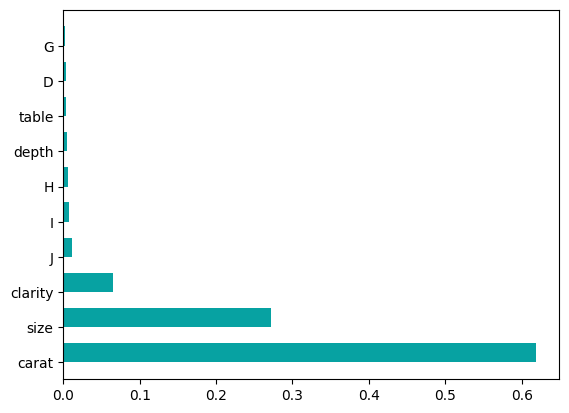

In [ ]:
fig, ax = plt.subplots()

ax.barh(feature_importances_id3.feature[:10],
        feature_importances_id3.importance[:10],
        height=0.55, align="edge",
        color="#07a2a2");
plt.show()

data 1

In [ ]:
id3 = DecisionTreeRegressor()
id3.fit(X1_train,y1_train)
y_pred = id3.predict(X1_test)
train_score = id3.score(X1_train, y1_train)
test_score = id3.score(X1_test, y1_test)

print('DecisionTree Regression model score using train set is: ', round(train_score, 3))
print('DecisionTree Regression model score using train set is: ',  round(test_score, 3))

DecisionTree Regression model score using train set is:  1.0
DecisionTree Regression model score using train set is:  0.967


In [ ]:
RMSE_id3 = mean_squared_error(y1_test, y_pred, squared=False)
RMSE_id3

698.6503281981774

data 2

In [ ]:
id3 = DecisionTreeRegressor()
id3.fit(X2_train,y2_train)
y_pred = id3.predict(X2_test)
train_score = id3.score(X2_train, y2_train)
test_score = id3.score(X2_test, y2_test)

print('DecisionTree Regression model score using train set is: ', round(train_score, 3))
print('DecisionTree Regression model score using train set is: ',  round(test_score, 3))

DecisionTree Regression model score using train set is:  1.0
DecisionTree Regression model score using train set is:  0.963


In [ ]:
RMSE_id3 = mean_squared_error(y2_test, y_pred, squared=False)
RMSE_id3

460.70195939374304

In [ ]:
feature_importances_id3 = pd.DataFrame(id3.feature_importances_,
                                       index = X2_train.columns,
                                       columns = ['importance']).sort_values('importance', ascending=False)
feature_importances_id3['feature'] = feature_importances_id3.index
feature_importances_id3

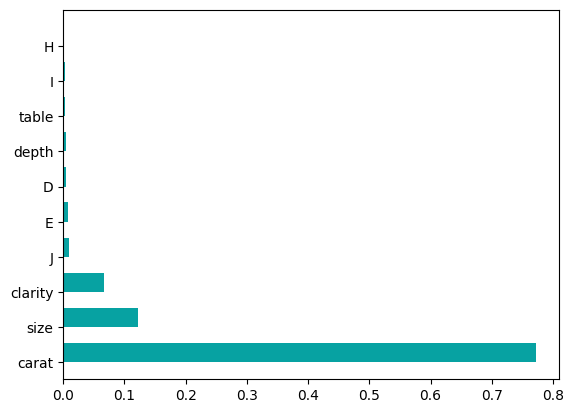

In [ ]:
fig, ax = plt.subplots()

ax.barh(feature_importances_id3.feature[:10],
        feature_importances_id3.importance[:10],
        height=0.55, align="edge",
        color="#07a2a2");
plt.show()

Data 3

In [39]:
id3 = DecisionTreeRegressor()
id3.fit(X_train,y_train)
y_pred = id3.predict(X_test)
train_score = id3.score(X_train, y_train)
test_score = id3.score(X_test, y_test)

print('DecisionTree Regression model score using train set is: ', round(train_score, 3))
print('DecisionTree Regression model score using train set is: ',  round(test_score, 3))

DecisionTree Regression model score using train set is:  1.0
DecisionTree Regression model score using train set is:  0.967


In [40]:
RMSE_id3 = mean_squared_error(y_test, y_pred, squared=False)
RMSE_id3

725.4456122128158

## Randomforest regression model


Original data

In [ ]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
train_score = rf.score(X_train, y_train)
test_score = rf.score(X_test, y_test)

print('RandomForest Regression model score using train set is: ', round(train_score, 3))
print('RandomForest Regression model score using train set is: ',  round(test_score, 3))

RandomForest Regression model score using train set is:  0.997
RandomForest Regression model score using train set is:  0.981


In [ ]:
RMSE_rf = mean_squared_error(y_test, y_pred, squared=False)
RMSE_rf

548.8341385985055

In [ ]:
feature_importances_rf = pd.DataFrame(rf.feature_importances_,
                                        index = X_train.columns,
                                        columns = ['importance']).sort_values('importance', ascending=False)

In [ ]:
feature_importances_rf['feature'] = feature_importances_rf.index

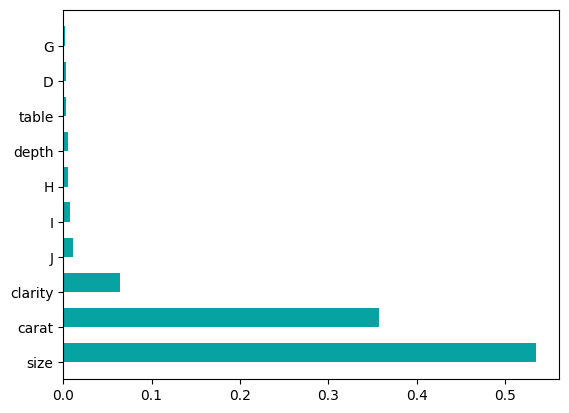

In [ ]:
fig, ax = plt.subplots()
ax.barh(feature_importances_rf.feature[:10],
        feature_importances_rf.importance[:10],
        height=0.55, align="edge",
        color="#07a2a2");
plt.show()

data 1

In [ ]:
rf1 = RandomForestRegressor()
rf1.fit(X1_train, y1_train)
y_pred = rf1.predict(X1_test)
train_score = rf1.score(X1_train, y1_train)
test_score = rf1.score(X1_test, y1_test)

print('RandomForest Regression model score using train set is: ', round(train_score, 3))
print('RandomForest Regression model score using train set is: ',  round(test_score, 3))

RandomForest Regression model score using train set is:  0.997
RandomForest Regression model score using train set is:  0.981


In [ ]:
RMSE_rf = mean_squared_error(y1_test, y_pred, squared=False)
RMSE_rf

534.8947246259983

In [ ]:
feature_importances_rf = pd.DataFrame(rf.feature_importances_,
                                        index = X1_train.columns,
                                        columns = ['importance']).sort_values('importance', ascending=False)

In [ ]:
feature_importances_rf['feature'] = feature_importances_rf.index

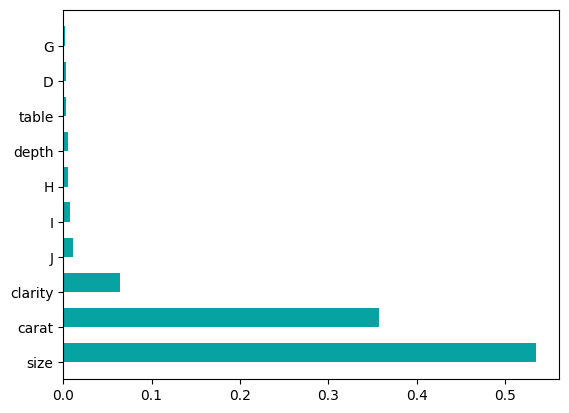

In [ ]:
fig, ax = plt.subplots()
ax.barh(feature_importances_rf.feature[:10],
        feature_importances_rf.importance[:10],
        height=0.55, align="edge",
        color="#07a2a2");
plt.show()

data 2

In [ ]:
rf = RandomForestRegressor()
rf.fit(X2_train, y2_train)
y_pred = rf.predict(X2_test)
train_score = rf.score(X2_train, y2_train)
test_score = rf.score(X2_test, y2_test)

print('RandomForest Regression model score using train set is: ', round(train_score, 3))
print('RandomForest Regression model score using train set is: ',  round(test_score, 3))

RandomForest Regression model score using train set is:  0.997
RandomForest Regression model score using train set is:  0.98


In [ ]:
RMSE_rf = mean_squared_error(y2_test, y_pred, squared=False)
RMSE_rf

341.3012168171897

Data 3

In [43]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
train_score = rf.score(X_train, y_train)
test_score = rf.score(X_test, y_test)

print('RandomForest Regression model score using train set is: ', round(train_score, 3))
print('RandomForest Regression model score using train set is: ',  round(test_score, 3))

RandomForest Regression model score using train set is:  0.997
RandomForest Regression model score using train set is:  0.982


In [44]:
RMSE_rf = mean_squared_error(y_test, y_pred, squared=False)
RMSE_rf

536.3853889227627

## LightGBM

LightGBM is a gradient boosting framework that uses tree-based learning algorithms. It is designed for efficiency, speed, and performance, making it a popular choice for machine learning tasks.

Here are some key features of LightGBM:

Gradient boosting framework that uses tree-based learning algorithms
Fast and efficient due to its optimized algorithms and data structures
Supports parallel and GPU learning
Handles large datasets with ease
Provides high accuracy and flexibility in model tuning

old data (with x,y,z and without size feature)

In [ ]:
lgbm = LGBMRegressor(force_col_wise=True)
lgbm_model = lgbm.fit(X_train, y_train)
y_pred = lgbm_model.predict(X_test)
train_score = lgbm_model.score(X_train, y_train)
test_score = lgbm_model.score(X_test, y_test)

print('LGBM Regression model score using train set is: ', round(train_score, 3))
print('LGBM Regression model score using train set is: ',  round(test_score, 3))

[LightGBM] [Info] Total Bins 1158
[LightGBM] [Info] Number of data points in the train set: 33632, number of used features: 15
[LightGBM] [Info] Start training from score 3838.544095
LGBM Regression model score using train set is:  0.986
LGBM Regression model score using train set is:  0.98


In [ ]:
RMSE_lgbm = mean_squared_error(y_test, y_pred, squared=False)
RMSE_lgbm

548.4250528187042

In [ ]:
i =0
for x,y in zip(y_test, y_pred):
  print('test: ', x, ' pred: ', int(y), '\n')
  i +=1
  if i>20:
    break

test:  766  pred:  836 

test:  573  pred:  626 

test:  6315  pred:  5892 

test:  5932  pred:  6625 

test:  2013  pred:  2392 

test:  581  pred:  569 

test:  10078  pred:  9429 

test:  6765  pred:  6943 

test:  4836  pred:  4600 

test:  772  pred:  786 

test:  3646  pred:  3662 

test:  7848  pred:  9775 

test:  3422  pred:  3626 

test:  666  pred:  599 

test:  649  pred:  735 

test:  7438  pred:  7567 

test:  3114  pred:  3354 

test:  1034  pred:  1186 

test:  6659  pred:  6680 

test:  10013  pred:  9499 

test:  851  pred:  731 



In [ ]:
feature_importances_lgbm = pd.DataFrame(lgbm_model.feature_importances_,
                                        index = X_train.columns,
                                        columns = ['importance']).sort_values('importance', ascending=False)


In [ ]:
feature_importances_lgbm['feature'] = feature_importances_lgbm.index

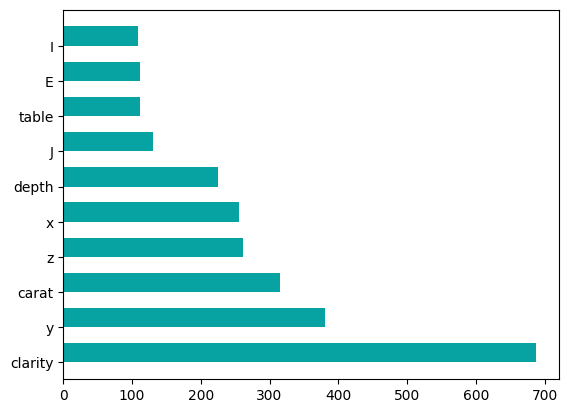

In [ ]:
fig, ax = plt.subplots()
ax.barh(feature_importances_lgbm.feature[:10],
        feature_importances_lgbm.importance[:10],
        height=0.55,
        align="edge",
        color="#07a2a2");
plt.show()

data 1

In [ ]:
lgbm = LGBMRegressor(force_col_wise=True)
lgbm_model = lgbm.fit(X1_train, y1_train)
y_pred = lgbm_model.predict(X1_test)
train_score = lgbm_model.score(X1_train, y1_train)
test_score = lgbm_model.score(X1_test, y1_test)

print('LGBM Regression model score using train set is: ', round(train_score, 3))
print('LGBM Regression model score using train set is: ',  round(test_score, 3))

[LightGBM] [Info] Total Bins 650
[LightGBM] [Info] Number of data points in the train set: 33632, number of used features: 13
[LightGBM] [Info] Start training from score 3838.544095
LGBM Regression model score using train set is:  0.985
LGBM Regression model score using train set is:  0.981


In [ ]:
RMSE_lgbm = mean_squared_error(y1_test, y_pred, squared=False)
RMSE_lgbm

531.9158745489547

data 2

In [ ]:
lgbm = LGBMRegressor(force_col_wise=True)
lgbm_model = lgbm.fit(X2_train, y2_train)
y_pred = lgbm_model.predict(X2_test)
train_score = lgbm_model.score(X2_train, y2_train)
test_score = lgbm_model.score(X2_test, y2_test)

print('LGBM Regression model score using train set is: ', round(train_score, 3))
print('LGBM Regression model score using train set is: ',  round(test_score, 3))

[LightGBM] [Info] Total Bins 561
[LightGBM] [Info] Number of data points in the train set: 27682, number of used features: 13
[LightGBM] [Info] Start training from score 2825.862040
LGBM Regression model score using train set is:  0.985
LGBM Regression model score using train set is:  0.982


In [ ]:
RMSE_lgbm = mean_squared_error(y2_test, y_pred, squared=False)
RMSE_lgbm

324.8470705252258

In [ ]:
feature_importances_lgbm = pd.DataFrame(lgbm_model.feature_importances_,
                                        index = X2_train.columns,
                                        columns = ['importance']).sort_values('importance', ascending=False)


In [ ]:
feature_importances_lgbm['feature'] = feature_importances_lgbm.index

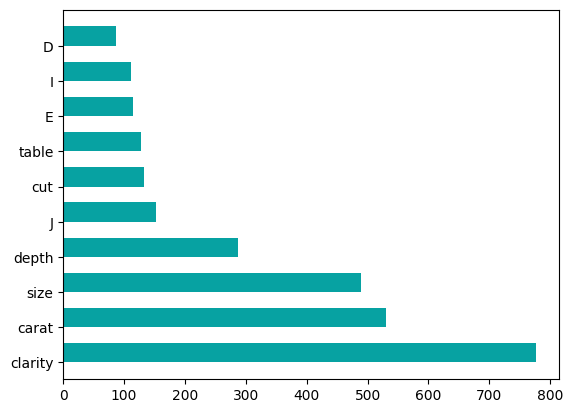

In [ ]:
fig, ax = plt.subplots()
ax.barh(feature_importances_lgbm.feature[:10],
        feature_importances_lgbm.importance[:10],
        height=0.55,
        align="edge",
        color="#07a2a2");
plt.show()

Data 3

In [45]:
lgbm = LGBMRegressor(force_col_wise=True)
lgbm_model = lgbm.fit(X_train, y_train)
y_pred = lgbm_model.predict(X_test)
train_score = lgbm_model.score(X_train, y_train)
test_score = lgbm_model.score(X_test, y_test)

print('LGBM Regression model score using train set is: ', round(train_score, 3))
print('LGBM Regression model score using train set is: ',  round(test_score, 3))

[LightGBM] [Info] Total Bins 1518
[LightGBM] [Info] Number of data points in the train set: 34515, number of used features: 10
[LightGBM] [Info] Start training from score 3935.219180
LGBM Regression model score using train set is:  0.986
LGBM Regression model score using train set is:  0.983


In [46]:
RMSE_lgbm = mean_squared_error(y_test, y_pred, squared=False)
RMSE_lgbm

522.8248662729359

## XGBoost  regression model

XGBoost (eXtreme Gradient Boosting) is an open-source machine learning library that provides an efficient and scalable implementation of gradient boosting for classification and regression tasks. It is known for its speed and performance, and is widely used in data science competitions and industry applications.

old data (with x,y,z and without size feature)

In [ ]:
xgbm = XGBRegressor()
xgbm.fit(X_train, y_train)
y_pred = xgbm.predict(X_test)
train_score = xgbm.score(X_train, y_train)
test_score = xgbm.score(X_test, y_test)

print('XGBoost Regression model score using train set is: ', round(train_score, 3))
print('XGBoost Regression model score using train set is: ',  round(test_score, 3))

XGBoost Regression model score using train set is:  0.991
XGBoost Regression model score using train set is:  0.979


In [ ]:
RMSE_xgboost = mean_squared_error(y_test, y_pred, squared=False)
RMSE_xgboost

562.6169456278172

In [ ]:
feature_importances_xgbm = pd.DataFrame(xgbm.feature_importances_,
                                        index = X_train.columns,
                                        columns = ['importance']).sort_values('importance', ascending=False)

In [ ]:
feature_importances_xgbm['feature'] = feature_importances_lgbm.index
feature_importances_xgbm

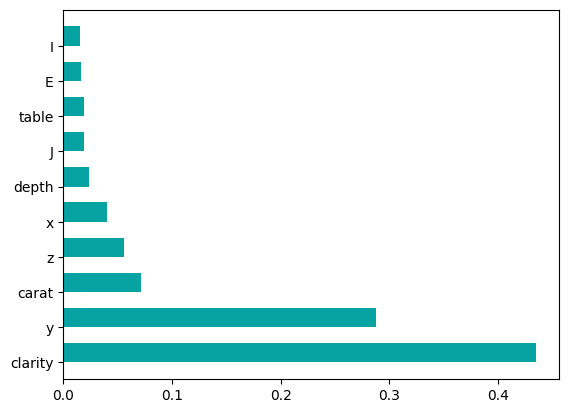

In [ ]:
fig, ax = plt.subplots()
ax.barh(feature_importances_xgbm.feature[:10],
        feature_importances_xgbm.importance[:10],
        height=0.55,
        align="edge",
        color="#07a2a2");
plt.show()

data 1

In [ ]:
xgbm = XGBRegressor()
xgbm.fit(X1_train, y1_train)
y_pred = xgbm.predict(X1_test)
train_score = xgbm.score(X1_train, y1_train)
test_score = xgbm.score(X1_test, y1_test)

print('XGBoost Regression model score using train set is: ', round(train_score, 3))
print('XGBoost Regression model score using train set is: ',  round(test_score, 3))

XGBoost Regression model score using train set is:  0.99
XGBoost Regression model score using train set is:  0.981


In [ ]:
RMSE_xgboost = mean_squared_error(y1_test, y_pred, squared=False)
RMSE_xgboost

530.6920528903577

data 2

In [ ]:
xgbm = XGBRegressor()
xgbm.fit(X2_train, y2_train)
y_pred = xgbm.predict(X2_test)
train_score = xgbm.score(X2_train, y2_train)
test_score = xgbm.score(X2_test, y2_test)

print('XGBoost Regression model score using train set is: ', round(train_score, 3))
print('XGBoost Regression model score using train set is: ',  round(test_score, 3))

XGBoost Regression model score using train set is:  0.99
XGBoost Regression model score using train set is:  0.981


In [ ]:
RMSE_xgboost = mean_squared_error(y2_test, y_pred, squared=False)
RMSE_xgboost

327.014706909031

In [ ]:
feature_importances_xgbm = pd.DataFrame(xgbm.feature_importances_,
                                        index = X2_train.columns,
                                        columns = ['importance']).sort_values('importance', ascending=False)

In [ ]:
feature_importances_xgbm['feature'] = feature_importances_lgbm.index
feature_importances_xgbm

,importance,feature
carat,0.482477,clarity
size,0.220909,carat
clarity,0.080100,size
J,0.074291,depth
E,0.050804,J
I,0.023787,cut
D,0.022911,table
G,0.019922,E
F,0.013381,I
H,0.003837,D


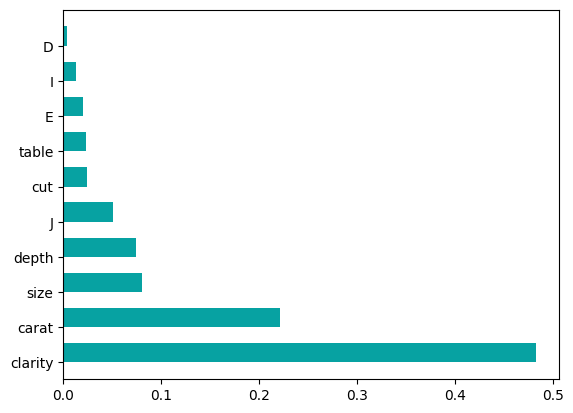

In [ ]:
fig, ax = plt.subplots()
ax.barh(feature_importances_xgbm.feature[:10],
        feature_importances_xgbm.importance[:10],
        height=0.55,
        align="edge",
        color="#07a2a2");
plt.show()

Data 3

In [47]:
xgbm = XGBRegressor()
xgbm.fit(X_train, y_train)
y_pred = xgbm.predict(X_test)
train_score = xgbm.score(X_train, y_train)
test_score = xgbm.score(X_test, y_test)

print('XGBoost Regression model score using train set is: ', round(train_score, 3))
print('XGBoost Regression model score using train set is: ',  round(test_score, 3))

XGBoost Regression model score using train set is:  0.991
XGBoost Regression model score using train set is:  0.982


In [48]:
RMSE_xgboost = mean_squared_error(y_test, y_pred, squared=False)
RMSE_xgboost

541.0526493275119

## MLP

old data (with x,y,z and without size feature)

In [ ]:
model = MLPRegressor(hidden_layer_sizes=(150, 50), activation='relu', solver='adam', max_iter=1000, verbose=True)
model.fit(X_train, y_train)

Iteration 1, loss = 14395582.79129523
Iteration 2, loss = 9085910.06992257
Iteration 3, loss = 5347590.96341910
Iteration 4, loss = 4619616.20577776
Iteration 5, loss = 3799796.46702817
Iteration 6, loss = 2897773.12830684
Iteration 7, loss = 2091247.51624699
Iteration 8, loss = 1580209.03998868
Iteration 9, loss = 1313821.80369459
Iteration 10, loss = 1146051.59529683
Iteration 11, loss = 1026376.55013590
Iteration 12, loss = 937591.43491110
Iteration 13, loss = 870948.74335334
Iteration 14, loss = 820582.16061655
Iteration 15, loss = 781671.76169054
Iteration 16, loss = 749638.43074423
Iteration 17, loss = 723784.01965768
Iteration 18, loss = 701141.98086670
Iteration 19, loss = 682012.75625936
Iteration 20, loss = 665857.41117048
Iteration 21, loss = 650226.79943933
Iteration 22, loss = 635374.50736551
Iteration 23, loss = 620227.75833575
Iteration 24, loss = 605629.10408003
Iteration 25, loss = 589663.72239240
Iteration 26, loss = 571077.60572502
Iteration 27, loss = 555871.1923375

In [ ]:
model.score(X_train, y_train), model.score(X_test, y_test)

(0.9733221859850348, 0.9677543822140167)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
RMSE_mlp = mean_squared_error(y_test, y_pred, squared=False)
RMSE_mlp

693.0049785988648

data 1

In [ ]:
mlp_model = MLPRegressor(hidden_layer_sizes=(150, 50), activation='relu', solver='adam', max_iter=1000, verbose=True)
mlp_model.fit(X1_train, y1_train)

Iteration 1, loss = 14492539.13695875
Iteration 2, loss = 9286419.28499237
Iteration 3, loss = 2111082.88657426
Iteration 4, loss = 818080.25315556
Iteration 5, loss = 710364.51644943
Iteration 6, loss = 664914.27041362
Iteration 7, loss = 639451.47381279
Iteration 8, loss = 622867.84012267
Iteration 9, loss = 611180.46921865
Iteration 10, loss = 601948.10515317
Iteration 11, loss = 594488.05008303
Iteration 12, loss = 587465.20775310
Iteration 13, loss = 581100.41435505
Iteration 14, loss = 575592.14801697
Iteration 15, loss = 570422.31805572
Iteration 16, loss = 565536.17238359
Iteration 17, loss = 560922.74878221
Iteration 18, loss = 556369.67439352
Iteration 19, loss = 551571.18767430
Iteration 20, loss = 547527.84700024
Iteration 21, loss = 542518.51445300
Iteration 22, loss = 537328.23760115
Iteration 23, loss = 531829.83953918
Iteration 24, loss = 526735.71087338
Iteration 25, loss = 521214.71517162
Iteration 26, loss = 516250.46587015
Iteration 27, loss = 511229.60755551
Iterat

In [ ]:
mlp_model.score(X1_train, y1_train), model.score(X1_test, y1_test)

(0.9754042863079159, 0.9743188991353846)

In [ ]:
y_pred = mlp_model.predict(X1_test)

In [ ]:
RMSE_mlp = mean_squared_error(y1_test, y_pred, squared=False)
RMSE_mlp

618.4545969546472

data 2

In [ ]:
model = MLPRegressor(hidden_layer_sizes=(150, 50), activation='relu', solver='adam', max_iter=1000, verbose=True)
model.fit(X2_train, y2_train)

In [ ]:
model.score(X2_train, y2_train), model.score(X2_test, y2_test)

(0.9729884031428867, 0.9715447663250616)

In [ ]:
y_pred = model.predict(X2_test)

In [ ]:
RMSE_mlp = mean_squared_error(y2_test, y_pred, squared=False)
RMSE_mlp

403.20493968516047

Data 3

In [49]:
model = MLPRegressor(hidden_layer_sizes=(150, 50), activation='relu', solver='adam', max_iter=1000, verbose=True)
model.fit(X_train, y_train)

Iteration 1, loss = 14951251.47658106
Iteration 2, loss = 7549255.32416021
Iteration 3, loss = 1980869.75695102
Iteration 4, loss = 1088109.63749829
Iteration 5, loss = 768629.66509598
Iteration 6, loss = 657132.36413023
Iteration 7, loss = 617471.18580102
Iteration 8, loss = 596653.60303730
Iteration 9, loss = 583371.37300576
Iteration 10, loss = 571203.07836741
Iteration 11, loss = 561155.53468679
Iteration 12, loss = 552197.53696803
Iteration 13, loss = 543109.29690380
Iteration 14, loss = 534113.30496528
Iteration 15, loss = 525553.79123066
Iteration 16, loss = 517715.26241425
Iteration 17, loss = 510585.90371837
Iteration 18, loss = 502522.90623411
Iteration 19, loss = 494945.27039262
Iteration 20, loss = 487633.11012348
Iteration 21, loss = 481458.69984656
Iteration 22, loss = 474841.85356806
Iteration 23, loss = 469174.12201152
Iteration 24, loss = 463415.71396665
Iteration 25, loss = 457159.69505830
Iteration 26, loss = 452317.93901068
Iteration 27, loss = 446305.59423578
Itera

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


MLPRegressor(hidden_layer_sizes=(150, 50), max_iter=1000, verbose=True)

In [50]:
model.score(X_train, y_train), model.score(X_test, y_test)

(0.9809084182069115, 0.9819571526558803)

In [51]:
y_pred = model.predict(X_test)

In [52]:
RMSE_mlp = mean_squared_error(y_test, y_pred, squared=False)
RMSE_mlp

536.5942734784675

# **Evaluation Using Cross-Validation**

**RandomForest**

In [ ]:
scores = cross_val_score(rf, X_train, y_train, scoring ="neg_mean_squared_error",cv = 10)
rf_rmse_scores = np.sqrt(-scores)
rf_rmse_scores

array([534.66122229, 518.78824222, 538.17376348, 575.76413234,
       540.60925556, 526.21698848, 547.88769078, 556.9721835 ,
       543.11514972, 519.20602191])

In [ ]:
print("Scores: ", rf_rmse_scores)
print("Mean: ", rf_rmse_scores.mean())
print("Standard Deviation: ", rf_rmse_scores.std())

Scores:  [534.66122229 518.78824222 538.17376348 575.76413234 540.60925556
 526.21698848 547.88769078 556.9721835  543.11514972 519.20602191]
Mean:  540.1394650281374
Standard Deviation:  16.56309745583089


data 2

In [ ]:
scores = cross_val_score(rf, X2_train, y2_train, scoring ="neg_mean_squared_error",cv = 10)
rf_rmse_scores = np.sqrt(-scores)
rf_rmse_scores

In [ ]:
print("Scores: ", rf_rmse_scores)
print("Mean: ", rf_rmse_scores.mean())
print("Standard Deviation: ", rf_rmse_scores.std())

**LGBM**

In [ ]:
lgbm_scores = cross_val_score(lgbm, X_train, y_train, scoring ="neg_mean_squared_error",cv = 10)
lgbm_rmse_scores = np.sqrt(-lgbm_scores)
lgbm_rmse_scores

[LightGBM] [Info] Total Bins 1153
[LightGBM] [Info] Number of data points in the train set: 30268, number of used features: 15
[LightGBM] [Info] Start training from score 3841.133673
[LightGBM] [Info] Total Bins 1152
[LightGBM] [Info] Number of data points in the train set: 30268, number of used features: 15
[LightGBM] [Info] Start training from score 3837.728459
[LightGBM] [Info] Total Bins 1154
[LightGBM] [Info] Number of data points in the train set: 30269, number of used features: 15
[LightGBM] [Info] Start training from score 3828.899270
[LightGBM] [Info] Total Bins 1150
[LightGBM] [Info] Number of data points in the train set: 30269, number of used features: 15
[LightGBM] [Info] Start training from score 3847.572070
[LightGBM] [Info] Total Bins 1152
[LightGBM] [Info] Number of data points in the train set: 30269, number of used features: 15
[LightGBM] [Info] Start training from score 3838.970035
[LightGBM] [Info] Total Bins 1151
[LightGBM] [Info] Number of data points in the trai

array([503.75214836, 509.54810948, 535.34478399, 562.82951398,
       527.92864554, 510.59474809, 540.30374362, 540.75932918,
       544.66070147, 509.62348855])

In [ ]:
print("Scores: ", lgbm_rmse_scores)
print("Mean: ", lgbm_rmse_scores.mean())
print("Standard Deviation: ", lgbm_rmse_scores.std())

Scores:  [503.75214836 509.54810948 535.34478399 562.82951398 527.92864554
 510.59474809 540.30374362 540.75932918 544.66070147 509.62348855]
Mean:  528.5345212278113
Standard Deviation:  18.506809449666974


data 2

In [ ]:
lgbm_scores = cross_val_score(lgbm, X2_train, y2_train, scoring ="neg_mean_squared_error",cv = 10)
lgbm_rmse_scores = np.sqrt(-lgbm_scores)
lgbm_rmse_scores

In [ ]:
print("Scores: ", lgbm_rmse_scores)
print("Mean: ", lgbm_rmse_scores.mean())
print("Standard Deviation: ", lgbm_rmse_scores.std())

**XGBoost**

In [ ]:
xgbm_scores = cross_val_score(xgbm, X_train, y_train, scoring ="neg_mean_squared_error",cv = 10)
xgbm_rmse_scores = np.sqrt(-xgbm_scores)
xgbm_rmse_scores

array([521.56642344, 507.24301766, 550.68265867, 560.23980338,
       521.35963595, 535.49976916, 545.19792576, 538.72292831,
       541.32104799, 505.70274578])

In [ ]:
print("Scores: ", xgbm_rmse_scores)
print("Mean: ", xgbm_rmse_scores.mean())
print("Standard Deviation: ", xgbm_rmse_scores.std())

Scores:  [521.56642344 507.24301766 550.68265867 560.23980338 521.35963595
 535.49976916 545.19792576 538.72292831 541.32104799 505.70274578]
Mean:  532.7535956079824
Standard Deviation:  17.27973702596814


data 2

In [ ]:
xgbm_scores = cross_val_score(xgbm, X2_train, y2_train, scoring ="neg_mean_squared_error",cv = 10)
xgbm_rmse_scores = np.sqrt(-xgbm_scores)
xgbm_rmse_scores

In [ ]:
print("Scores: ", xgbm_rmse_scores)
print("Mean: ", xgbm_rmse_scores.mean())
print("Standard Deviation: ", xgbm_rmse_scores.std())

# **Models Parameters Tuning:**

**We will go through parameters fine tuning only with models with the high scores and low RMSE:**
1. RandomForest
2. LGBM
3. XGBoost


**RandomForest**

In [ ]:
parameters = {
    'n_estimators': [200, 400, 600],
    'max_depth': [50, 60, 70],
    'max_features': [5,10,15],
    }
rf = RandomForestRegressor(random_state=42)
rf_rs = RandomizedSearchCV(rf, parameters, scoring = 'neg_mean_squared_error', cv=10)
rf_rs.fit(X_train, y_train)
rf_rs.best_params_

{'n_estimators': 600, 'max_features': 10, 'max_depth': 70}

In [ ]:
np.sqrt(-rf_rs.best_score_)

533.9260550542344

In [ ]:
rf_rs.best_estimator_

RandomForestRegressor(max_depth=70, max_features=10, n_estimators=600,
                      random_state=42)

In [ ]:
# rf_best = RandomForestRegressor(n_estimators = 200, max_features= 10, max_depth = 50)
# rf_best.fit(X_train,y_train)
y_pred = rf_rs.predict(X_test)
rf_rs.score(X_test, y_test), rf_rs.score(X_train, y_train)

(-303670.9059516824, -37949.108703996986)

In [ ]:
RMSE_rf = mean_squared_error(y_test, y_pred, squared=False)
RMSE_rf

551.0634318766602

In [ ]:
feature_importances_rf= pd.DataFrame(rf_best.feature_importances_,
                                     index = X_train.columns,
                                     columns = ['importance']).sort_values('importance', ascending=False)


In [ ]:
feature_importances_rf['feature'] = feature_importances_rf.index

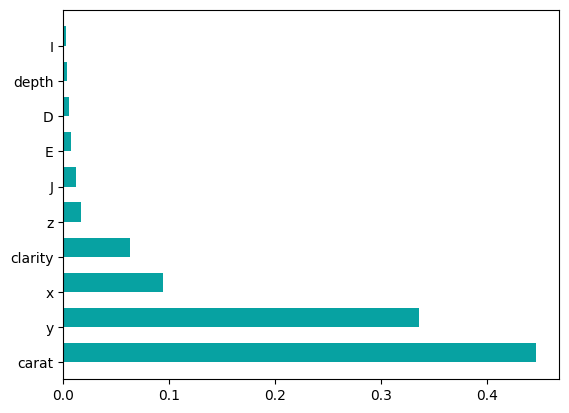

In [ ]:
fig, ax = plt.subplots()
ax.barh(feature_importances_rf.feature[:10],
        feature_importances_rf.importance[:10],
        height=0.55, align="edge",
        color="#07a2a2");
plt.show()

In [ ]:

joblib.dump(rf_best, "randomforest_model.pkl")

['randomforest_model.pkl']

data 2

In [ ]:
parameters = {
    'n_estimators': [200, 400, 600],
    'max_depth': [50, 60, 70],
    'max_features': [5,10,15],
    }
rf = RandomForestRegressor(random_state=42)
rf_rs = RandomizedSearchCV(rf, parameters, scoring = 'neg_mean_squared_error', cv=10)
rf_rs.fit(X2_train, y2_train)
rf_rs.best_params_

In [ ]:
np.sqrt(-rf_rs.best_score_)

In [ ]:
rf_rs.best_estimator_

In [ ]:
# rf_best = RandomForestRegressor(n_estimators = 200, max_features= 10, max_depth = 50)
# rf_best.fit(X_train,y_train)
y_pred = rf_rs.predict(X2_test)
rf_rs.score(X2_test, y2_test), rf_rs.score(X2_train, y2_train)

In [ ]:
RMSE_rf = mean_squared_error(y2_test, y_pred, squared=False)
RMSE_rf

In [ ]:
feature_importances_rf= pd.DataFrame(rf_rs.feature_importances_,
                                     index = X2_train.columns,
                                     columns = ['importance']).sort_values('importance', ascending=False)


In [ ]:
feature_importances_rf['feature'] = feature_importances_rf.index

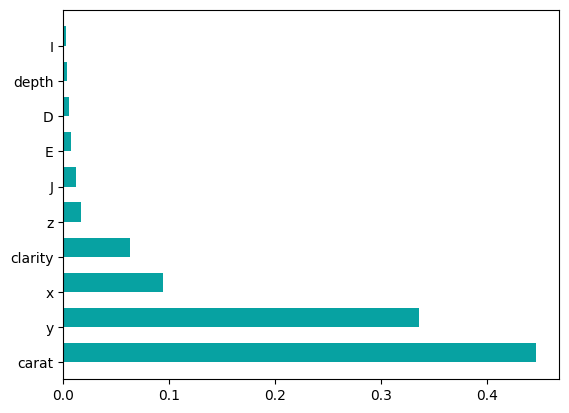

In [ ]:
fig, ax = plt.subplots()
ax.barh(feature_importances_rf.feature[:10],
        feature_importances_rf.importance[:10],
        height=0.55, align="edge",
        color="#07a2a2");
plt.show()

In [ ]:
joblib.dump(rf_best, "randomforest_model.pkl")

Data 3

In [53]:
parameters = {
    'n_estimators': [200, 400, 600],
    'max_depth': [50, 60, 70],
    'max_features': [5,10,15],
    }
rf = RandomForestRegressor(random_state=42)
rf_rs = RandomizedSearchCV(rf, parameters, scoring = 'neg_mean_squared_error', cv=10)
rf_rs.fit(X_train, y_train)
rf_rs.best_params_

KeyboardInterrupt: 

In [ ]:
np.sqrt(-rf_rs.best_score_)

533.9260550542344

In [ ]:
rf_rs.best_estimator_

RandomForestRegressor(max_depth=70, max_features=10, n_estimators=600,
                      random_state=42)

In [ ]:
# rf_best = RandomForestRegressor(n_estimators = 200, max_features= 10, max_depth = 50)
# rf_best.fit(X_train,y_train)
y_pred = rf_rs.predict(X_test)
rf_rs.score(X_test, y_test), rf_rs.score(X_train, y_train)

(-303670.9059516824, -37949.108703996986)

In [ ]:
RMSE_rf = mean_squared_error(y_test, y_pred, squared=False)
RMSE_rf

551.0634318766602

**LGBM**

In [ ]:
parameters = {
    'n_estimators': [200, 250, 300],
    'reg_alpha': [0.1, 0.5, 1],
    }
lgbm = LGBMRegressor()
lgbm_rs = RandomizedSearchCV(lgbm, parameters, scoring = 'neg_mean_squared_error', cv=10)
lgbm_rs.fit(X_train, y_train)
lgbm_rs.best_params_

In [ ]:
np.sqrt(-lgbm_rs.best_score_)

517.9288747529464

In [ ]:
lgbm_rs.best_estimator_

LGBMRegressor(n_estimators=250, reg_alpha=0.1)

In [ ]:
lgbm_best = LGBMRegressor(n_estimators = 250, max_features= 6, reg_alpha=0.1)
lgbm_best.fit(X_train,y_train)
y_pred = lgbm_best.predict(X_test)
lgbm_best.score(X_test, y_test), lgbm_best.score(X_train, y_train)


[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015351 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1158
[LightGBM] [Info] Number of data points in the train set: 33632, number of used features: 15
[LightGBM] [Info] Start training from score 3838.544095
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: max_features


(0.9804735156978907, 0.9896222537545278)

In [ ]:
RMSE_lgbm = mean_squared_error(y_test, y_pred, squared=False)
RMSE_lgbm

539.2784079172043

In [ ]:
feature_importances_lgbm= pd.DataFrame(lgbm_best.feature_importances_,
                                     index = X_train.columns,
                                     columns = ['importance']).sort_values('importance', ascending=False)

In [ ]:
feature_importances_lgbm['feature'] = feature_importances_lgbm.index

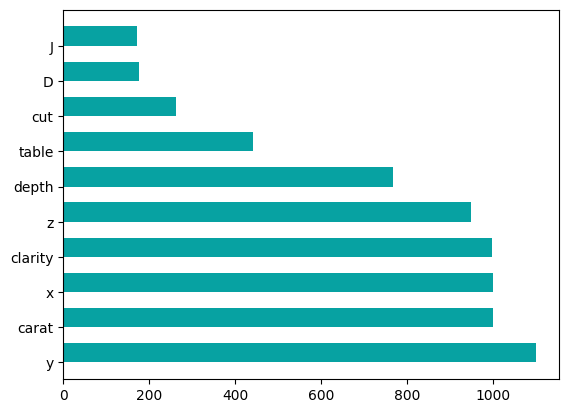

In [ ]:
fig, ax = plt.subplots()
ax.barh(feature_importances_lgbm.feature[:10],
        feature_importances_lgbm.importance[:10],
        height=0.55, align="edge",
        color="#07a2a2");
plt.show()

In [ ]:
joblib.dump(lgbm_best, "lgbm_model.pkl")

['lgbm_model.pkl']

data 2

In [ ]:
parameters = {
    'n_estimators': [200, 250, 300],
    'reg_alpha': [0.1, 0.5, 1],
    }
lgbm = LGBMRegressor()
lgbm_rs = RandomizedSearchCV(lgbm, parameters, scoring = 'neg_mean_squared_error', cv=10)
lgbm_rs.fit(X2_train, y2_train)
lgbm_rs.best_params_

In [ ]:
np.sqrt(-lgbm_rs.best_score_)

In [ ]:
lgbm_rs.best_estimator_

In [ ]:
lgbm_best = LGBMRegressor(n_estimators = 250, max_features= 6, reg_alpha=0.1)
lgbm_best.fit(X2_train,y2_train)
y_pred = lgbm_best.predict(X2_test)
lgbm_best.score(X2_test, y2_test), lgbm_best.score(X2_train, y2_train)


In [ ]:
RMSE_lgbm = mean_squared_error(y2_test, y2_pred, squared=False)
RMSE_lgbm

In [ ]:
feature_importances_lgbm= pd.DataFrame(lgbm_best.feature_importances_,
                                     index = X2_train.columns,
                                     columns = ['importance']).sort_values('importance', ascending=False)

In [ ]:
feature_importances_lgbm['feature'] = feature_importances_lgbm.index

In [ ]:
fig, ax = plt.subplots()
ax.barh(feature_importances_lgbm.feature[:10],
        feature_importances_lgbm.importance[:10],
        height=0.55, align="edge",
        color="#07a2a2");
plt.show()

In [ ]:
joblib.dump(lgbm_best, "lgbm_model.pkl")

['lgbm_model.pkl']

Data 3

In [54]:
parameters = {
    'n_estimators': [200, 250, 300],
    'reg_alpha': [0.1, 0.5, 1],
    }
lgbm = LGBMRegressor()
lgbm_rs = RandomizedSearchCV(lgbm, parameters, scoring = 'neg_mean_squared_error', cv=10)
lgbm_rs.fit(X_train, y_train)
lgbm_rs.best_params_

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005835 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1517
[LightGBM] [Info] Number of data points in the train set: 31063, number of used features: 10
[LightGBM] [Info] Start training from score 3937.876412
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012173 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1514
[LightGBM] [Info] Number of data points in the train set: 31063, number of used features: 10
[LightGBM] [Info] Start training from score 3942.650130
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012054 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1513
[LightGBM] [Info] Number of data points in the train set: 31063, number of used features: 10
[LightGBM] [Info] Sta

{'reg_alpha': 0.1, 'n_estimators': 250}

In [55]:
np.sqrt(-lgbm_rs.best_score_)

545.7565754281236

In [56]:
lgbm_rs.best_estimator_

LGBMRegressor(n_estimators=250, reg_alpha=0.1)

In [57]:
lgbm_best = LGBMRegressor(n_estimators = 250, max_features= 6, reg_alpha=0.1)
lgbm_best.fit(X_train,y_train)
y_pred = lgbm_best.predict(X_test)
lgbm_best.score(X_test, y_test), lgbm_best.score(X_train, y_train)


[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005543 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1518
[LightGBM] [Info] Number of data points in the train set: 34515, number of used features: 10
[LightGBM] [Info] Start training from score 3935.219180
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: max_features


(0.9831294675429738, 0.9894110294853254)

In [58]:
RMSE_lgbm = mean_squared_error(y_test, y_pred, squared=False)
RMSE_lgbm

518.8691991651107

**XGBoost**

In [ ]:
parameters = {
    'n_estimators': [600, 700, 800],
    'learning_rate': [0.01, 0.05],
    'min_split_loss': [0, 0.1],
    }
xgbm = XGBRegressor()
xgbm_rs = RandomizedSearchCV(xgbm, parameters, scoring = 'neg_mean_squared_error', cv=10)
xgbm_rs.fit(X_train, y_train)
xgbm_rs.best_params_

{'n_estimators': 600, 'min_split_loss': 0, 'learning_rate': 0.05}

In [ ]:
np.sqrt(-xgbm_rs.best_score_)

518.4588979840512

In [ ]:
xgbm_rs.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, min_split_loss=0, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=600,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
# xgbm.feature_importances_
# xgbm_best = XGBRegressor(n_estimators= 600, learning_rate=0.01, max_depth=10, min_split_loss=0.1)
# xgbm_best.fit(X_train, y_train)
train_score = xgbm_rs.score(X_train, y_train)
test_score = xgbm_rs.score(X_test, y_test)

print('XGBoost Regression model score using train set is: ', round(train_score, 3))
print('XGBoost Regression model score using train set is: ',  round(test_score, 3))

XGBoost Regression model score using train set is:  -131447.919
XGBoost Regression model score using train set is:  -295717.866


In [ ]:
y_pred = xgbm_rs.predict(X_test)


In [ ]:
RMSE_xgbm = mean_squared_error(y_test, y_pred, squared=False)
RMSE_xgbm

543.7994725400665

In [ ]:
feature_importances_xgbm = pd.DataFrame(xgbm_best.feature_importances_,
                                        index = X_train.columns,
                                        columns = ['importance']).sort_values('importance', ascending=False)
feature_importances_xgbm['feature'] = feature_importances_xgbm.index

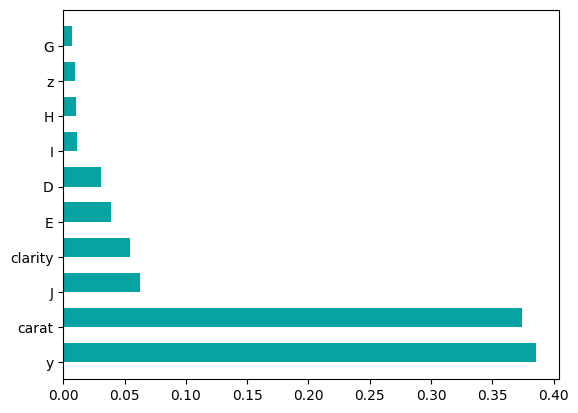

In [ ]:
fig, ax = plt.subplots()
ax.barh(feature_importances_xgbm.feature[:10],
        feature_importances_xgbm.importance[:10],
        height=0.55, align="edge",
        color="#07a2a2");
plt.show()

In [ ]:
joblib.dump(xgbm_best, "xgbm_model.pkl")

['xgbm_model.pkl']

data 2

In [ ]:
parameters = {
    'n_estimators': [600, 700, 800],
    'learning_rate': [0.01, 0.05],
    'min_split_loss': [0, 0.1],
    }
xgbm = XGBRegressor()
xgbm_rs = RandomizedSearchCV(xgbm, parameters, scoring = 'neg_mean_squared_error', cv=10)
xgbm_rs.fit(X2_train, y2_train)
xgbm_rs.best_params_

In [ ]:
np.sqrt(-xgbm_rs.best_score_)

In [ ]:
xgbm_rs.best_estimator_

In [ ]:
# xgbm.feature_importances_
# xgbm_best = XGBRegressor(n_estimators= 600, learning_rate=0.01, max_depth=10, min_split_loss=0.1)
# xgbm_best.fit(X_train, y_train)
train_score = xgbm_rs.score(X2_train, y2_train)
test_score = xgbm_rs.score(X2_test, y2_test)

print('XGBoost Regression model score using train set is: ', round(train_score, 3))
print('XGBoost Regression model score using train set is: ',  round(test_score, 3))

In [ ]:
y_pred = xgbm_rs.predict(X2_test)


In [ ]:
RMSE_xgbm = mean_squared_error(y2_test, y_pred, squared=False)
RMSE_xgbm

In [ ]:
feature_importances_xgbm = pd.DataFrame(xgbm_best.feature_importances_,
                                        index = X2_train.columns,
                                        columns = ['importance']).sort_values('importance', ascending=False)
feature_importances_xgbm['feature'] = feature_importances_xgbm.index

In [ ]:
fig, ax = plt.subplots()
ax.barh(feature_importances_xgbm.feature[:10],
        feature_importances_xgbm.importance[:10],
        height=0.55, align="edge",
        color="#07a2a2");
plt.show()

In [ ]:
joblib.dump(xgbm_best, "xgbm_model.pkl")

Data 3

In [59]:
parameters = {
    'n_estimators': [600, 700, 800],
    'learning_rate': [0.01, 0.05],
    'min_split_loss': [0, 0.1],
    }
xgbm = XGBRegressor()
xgbm_rs = RandomizedSearchCV(xgbm, parameters, scoring = 'neg_mean_squared_error', cv=10)
xgbm_rs.fit(X_train, y_train)
xgbm_rs.best_params_

{'n_estimators': 600, 'min_split_loss': 0.1, 'learning_rate': 0.05}

In [60]:
np.sqrt(-xgbm_rs.best_score_)

541.0673367999939

In [61]:
xgbm_rs.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, min_split_loss=0.1, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=600,
             n_jobs=None, num_parallel_tree=None, ...)

In [62]:
# xgbm.feature_importances_
# xgbm_best = XGBRegressor(n_estimators= 600, learning_rate=0.01, max_depth=10, min_split_loss=0.1)
# xgbm_best.fit(X_train, y_train)
train_score = xgbm_rs.score(X_train, y_train)
test_score = xgbm_rs.score(X_test, y_test)

print('XGBoost Regression model score using train set is: ', round(train_score, 3))
print('XGBoost Regression model score using train set is: ',  round(test_score, 3))

XGBoost Regression model score using train set is:  -141088.501
XGBoost Regression model score using train set is:  -271873.239


In [63]:
y_pred = xgbm_rs.predict(X_test)


In [64]:
RMSE_xgbm = mean_squared_error(y_test, y_pred, squared=False)
RMSE_xgbm

521.4146516972505

# **Test data submission**

**Test data preperation:**

In [ ]:
test_data = pd.read_csv("/content/test.csv")
test_data.head()

,Id,carat,cut,color,clarity,depth,table,x,y,z
0,1,0.34,Ideal,G,VVS2,61.1,57.0,4.52,4.48,2.75
1,2,0.71,Premium,E,VS2,62.7,58.0,5.74,5.68,3.58
2,3,0.44,Very Good,I,VS1,62.8,56.0,4.83,4.88,3.05
3,4,0.81,Premium,E,SI2,60.1,59.0,6.09,6.03,3.65
4,5,0.40,Ideal,G,VVS1,61.2,56.0,4.74,4.80,2.92


In [ ]:
# adding size feature and removing x, y, z columns
test_data['size'] = test_data.x * test_data.y * test_data.z
test_data.drop(['x', 'y', 'z'], axis=1, inplace=True)

In [ ]:
# feature transformation like we did with training data
test_data[['cut']] = test_data[['cut']].apply(lr_cut.transform)
test_data[['clarity']] = test_data[['clarity']].apply(lr_clarity.transform)

test_data_prepared = full_pipeline.transform(test_data)

In [ ]:
df_col_names = ['carat', 'cut','clarity', 'depth', 'table','size', 'D', 'E', 'F', 'G', 'H', 'I', 'J' ]
test_data_prepared = pd.DataFrame(test_data_prepared, columns=df_col_names)
test_data_prepared.head()

,carat,cut,clarity,depth,table,size,D,E,F,G,H,I,J
0,-0.980670,-0.605281,1.829142,-0.505137,-0.179971,-0.983973,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.159068,0.406992,0.666720,0.754194,0.295144,-0.145378,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,-0.758615,1.419266,0.085509,0.832902,-0.655085,-0.761339,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.062986,0.406992,-0.495702,-1.292219,0.770259,0.092577,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,-0.847437,-0.605281,1.247931,-0.426429,-0.655085,-0.836276,0.0,0.0,0.0,1.0,0.0,0.0,0.0


**price prediction**

predicting using the best models

In [ ]:
# test_predicted = lgbm_best.predict(test_data_prepared)
# test_predicted = xgbm_best.predict(test_data_prepared)
# test_predicted = model.predict(test_data_prepared)
# test_predicted = logistic_model.predict(test_data_prepared)
# test_predicted = lgbm_rs.predict(test_data_prepared)
# test_predicted = xgbm.predict(test_data_prepared)
test_predicted = rf1.predict(test_data_prepared)
# test_predicted = lgbm_model.predict(test_data_prepared)

In [ ]:
# the predicted values are float, but price has to be integer value so we need to transform the results.
sub = {'Id': test_data.Id, 'price': test_predicted}
submission = pd.DataFrame(sub)
submission.head()

,Id,price
0,1,808.876667
1,2,2939.477000
2,3,961.445000
3,4,2752.960000
4,5,1107.400000


In [ ]:
integers = lambda x: int(x)
submission.price = submission.price.map(integers)

In [ ]:
submission.to_csv('submission_rf1.csv', index=False)

#**Last test **

In [83]:
test_data = pd.read_csv("/content/drive/MyDrive/test.csv")
test_data.head()

,Id,carat,cut,color,clarity,depth,table,x,y,z
0,1,0.34,Ideal,G,VVS2,61.1,57.0,4.52,4.48,2.75
1,2,0.71,Premium,E,VS2,62.7,58.0,5.74,5.68,3.58
2,3,0.44,Very Good,I,VS1,62.8,56.0,4.83,4.88,3.05
3,4,0.81,Premium,E,SI2,60.1,59.0,6.09,6.03,3.65
4,5,0.40,Ideal,G,VVS1,61.2,56.0,4.74,4.80,2.92


In [84]:
# adding size feature and removing x, y, z columns
test_data['size'] = test_data.x * test_data.y * test_data.z
#test_data.drop(['x', 'y', 'z'], axis=1, inplace=True)

In [85]:
# Apply the same ordinal encoder to 'cut', 'clarity', and 'color'
test_data[['cut', 'clarity', 'color']] = ordinal_encoder.transform(test_data[['cut', 'clarity', 'color']])

test_data_prepared = full_pipeline.transform(test_data)

In [96]:
df_col_names = ['id','carat', 'cut','clarity', 'depth', 'table','x', 'y', 'z','size']
test_data_prepared = pd.DataFrame(test_data_prepared, columns=df_col_names)
test_data_prepared.head()

,id,carat,cut,clarity,depth,table,x,y,z,size
0,-0.968943,0.980782,-0.241192,1.184788,-0.454513,-0.209491,-1.119327,-1.109461,-0.969159,-1.081772
1,-0.187246,0.086016,0.932796,-0.027502,0.671053,0.238984,-0.049768,0.056710,-0.172022,0.005869
2,-0.757673,-0.808751,-1.415180,0.578643,0.741401,-0.657966,-0.762807,-0.687953,-0.757532,-0.805404
3,0.024023,0.086016,0.932796,-1.239792,-1.157992,0.687459,0.262186,0.155062,0.054170,0.317898
4,-0.842181,0.980782,-0.241192,1.790933,-0.384165,-0.657966,-0.834111,-0.870607,-0.828763,-0.885640


**price prediction**

predicting using the best models

In [97]:
# test_predicted = lgbm_best.predict(test_data_prepared)
# test_predicted = xgbm_best.predict(test_data_prepared)
# test_predicted = model.predict(test_data_prepared)
# test_predicted = logistic_model.predict(test_data_prepared)
 test_predicted = lgbm_rs.predict(test_data_prepared)
# test_predicted = xgbm.predict(test_data_prepared)
#test_predicted = rf1.predict(test_data_prepared)
# test_predicted = lgbm_model.predict(test_data_prepared)

IndentationError: unexpected indent (<ipython-input-97-2450ef60d90c>, line 5)

In [ ]:
# the predicted values are float, but price has to be integer value so we need to transform the results.
sub = {'Id': test_data.Id, 'price': test_predicted}
submission = pd.DataFrame(sub)
submission.head()

,Id,price
0,1,808.876667
1,2,2939.477000
2,3,961.445000
3,4,2752.960000
4,5,1107.400000


In [ ]:
integers = lambda x: int(x)
submission.price = submission.price.map(integers)

In [ ]:
submission.to_csv('submission_rf1.csv', index=False)

In [105]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Load the test data
test_data = pd.read_csv("/content/drive/MyDrive/test.csv")
print(test_data.head())

# Adding size feature and removing x, y, z columns
test_data['size'] = test_data.x * test_data.y * test_data.z
test_data.drop(['x', 'y', 'z'], axis=1, inplace=True)

# Ensure all categorical columns are strings
test_data['cut'] = test_data['cut'].astype(str)
test_data['clarity'] = test_data['clarity'].astype(str)
test_data['color'] = test_data['color'].astype(str)

# Define the order of categories for each ordinal feature
cut_categories = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
clarity_categories = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
color_categories = ['J', 'I', 'H', 'G', 'F', 'E', 'D']

# Create an OrdinalEncoder with these categories
ordinal_encoder = OrdinalEncoder(categories=[cut_categories, clarity_categories, color_categories])

# Transform the ordinal features
test_data[['cut', 'clarity', 'color']] = ordinal_encoder.fit_transform(test_data[['cut', 'clarity', 'color']])

# Identify numeric attributes
data_num = test_data.select_dtypes(np.number).columns
num_attribs = list(data_num)

# Create the full pipeline for data transformation
full_pipeline = ColumnTransformer([
  ("num", StandardScaler(), num_attribs),
])

# Apply the pipeline to the test data
test_data_prepared = full_pipeline.fit_transform(test_data)

# Create column names for the transformed data
df_col_names = ['carat', 'cut', 'clarity', 'depth', 'table','size']

# Convert the transformed data back to a DataFrame
test_data_prepared = pd.DataFrame(test_data_prepared, columns=df_col_names)
print(test_data_prepared.head())

# Predicting using the trained model
test_predicted = lgbm_rs.predict(test_data_prepared)

# Create a submission DataFrame
sub = {'Id': test_data.Id, 'price': test_predicted}
submission = pd.DataFrame(sub)
submission.head()

# Convert the predicted prices to integer values
submission.price = submission.price.astype(int)

# Save the submission to a CSV file
submission.to_csv('submission_rf1.csv', index=False)
print("Submission file created successfully.")


   Id  carat        cut color clarity  depth  table     x     y     z
0   1   0.34      Ideal     G    VVS2   61.1   57.0  4.52  4.48  2.75
1   2   0.71    Premium     E     VS2   62.7   58.0  5.74  5.68  3.58
2   3   0.44  Very Good     I     VS1   62.8   56.0  4.83  4.88  3.05
3   4   0.81    Premium     E     SI2   60.1   59.0  6.09  6.03  3.65
4   5   0.40      Ideal     G    VVS1   61.2   56.0  4.74  4.80  2.92


ValueError: Shape of passed values is (10788, 8), indices imply (10788, 6)